# Machine Learning to Predict College Level English Success

#### Matched high school records of students enrolling in the California Community College System
Dalton, Beer, Kommanapalli

Import the dataset

In [1]:
# Remove dataset if already created
MMAPEnglish = 0
English = 0

In [2]:
import numpy as np
import pandas as pd

#importing the data 
MMAPEnglish = pd.read_csv('EnglishTransferLevel040718_SQL03.csv')
English = MMAPEnglish

In [3]:
MMAPEnglish['IpedsRace'].unique()

array(['B', 'W', 'H', 'A', 'T', 'X', 'P', 'N'], dtype=object)

In [4]:
English.describe()

,StudentID,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,hs_09_grade_level,hs_09_school_code,hs_09_year_term_code,hs_09_course_id,hs_09_course_grade_points,hs_09_course_grade_category,...,cc_primacy_year_term_code,cc_primacy_course_grade_points,cc_primacy_course_grade_category,cc_primacy_course_success_ind,cc_00_year_term_code,cc_00_course_grade_points,cc_00_course_grade_category,cc_00_course_success_ind,IsDsps,IsEops
count,59998.000000,59998.000000,59992.000000,59998.000000,54311.0,5.431100e+04,54311.000000,54311.000000,54311.000000,54311.000000,...,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,29999.500000,2.793210,2.697248,2.810833,9.0,2.879440e+13,20100.477785,2122.713815,2.643685,1.771704,...,20145.666906,2.227844,-12.079753,0.698973,20145.701657,2.236886,-11.851778,0.701557,0.040285,0.072269
std,17320.075062,0.601248,0.746214,0.600106,0.0,1.240929e+13,19.751992,12.392879,1.107439,9.785037,...,11.904480,1.527977,35.572728,0.458708,11.921412,1.525333,35.347334,0.457579,0.196628,0.258935
min,1.000000,0.000000,0.000000,0.000000,9.0,1.019560e+12,19983.000000,2100.000000,0.000000,-99.000000,...,20117.000000,0.000000,-99.000000,0.000000,20117.000000,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,15000.250000,2.408000,2.217000,2.432000,9.0,1.964730e+13,20091.000000,2113.000000,2.000000,2.000000,...,20137.000000,0.000000,1.000000,0.000000,20137.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,29999.500000,2.839000,2.763000,2.857000,9.0,3.066650e+13,20103.000000,2130.000000,3.000000,3.000000,...,20147.000000,3.000000,3.000000,1.000000,20147.000000,3.000000,3.000000,1.000000,0.000000,0.000000
75%,44998.750000,3.234000,3.250000,3.247000,9.0,3.667880e+13,20113.000000,2130.000000,3.700000,4.000000,...,20157.000000,3.700000,4.000000,1.000000,20157.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,59998.000000,4.000000,4.000000,4.000000,9.0,5.872740e+13,20155.000000,2171.000000,4.000000,4.000000,...,20173.000000,4.000000,4.000000,1.000000,20174.000000,4.000000,4.000000,1.000000,1.000000,1.000000


Remove Nan's

In [5]:
# Remove NAN's
English.dropna(inplace=True)

In [6]:
# Check Count
English.shape[0]

32092

Quick check of the dataset

In [7]:
# Print summary statistics of data that exist in dataframe
English.describe()

,StudentID,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,hs_09_grade_level,hs_09_school_code,hs_09_year_term_code,hs_09_course_id,hs_09_course_grade_points,hs_09_course_grade_category,...,cc_primacy_year_term_code,cc_primacy_course_grade_points,cc_primacy_course_grade_category,cc_primacy_course_success_ind,cc_00_year_term_code,cc_00_course_grade_points,cc_00_course_grade_category,cc_00_course_success_ind,IsDsps,IsEops
count,32092.000000,32092.000000,32092.000000,32092.00000,32092.0,3.209200e+04,32092.000000,32092.000000,32092.000000,32092.000000,...,32092.000000,32092.00000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000
mean,29999.963137,2.831540,2.726867,2.85284,9.0,2.907699e+13,20100.074723,2123.328774,2.670008,2.332731,...,20145.796772,2.23513,-11.451701,0.706874,20145.830020,2.242437,-11.267263,0.709055,0.036302,0.074099
std,17300.371483,0.553279,0.689129,0.54896,0.0,1.193025e+13,19.809313,12.033804,1.076529,6.403027,...,11.920512,1.51879,34.927118,0.455203,11.934731,1.516125,34.738104,0.454205,0.187043,0.261937
min,1.000000,0.447000,0.000000,0.48700,9.0,1.611190e+12,19983.000000,2100.000000,0.000000,-99.000000,...,20125.000000,0.00000,-99.000000,0.000000,20125.000000,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,15029.750000,2.463000,2.263000,2.49200,9.0,1.964880e+13,20093.000000,2130.000000,2.000000,2.000000,...,20137.000000,0.00000,1.000000,0.000000,20137.000000,0.700000,1.000000,0.000000,0.000000,0.000000
50%,30005.000000,2.863500,2.786000,2.88600,9.0,3.066620e+13,20103.000000,2130.000000,3.000000,3.000000,...,20147.000000,3.00000,3.000000,1.000000,20147.000000,3.000000,3.000000,1.000000,0.000000,0.000000
75%,45005.500000,3.239000,3.250000,3.25300,9.0,3.667840e+13,20113.000000,2130.000000,3.700000,4.000000,...,20157.000000,3.70000,4.000000,1.000000,20157.000000,3.700000,4.000000,1.000000,0.000000,0.000000
max,59998.000000,4.000000,4.000000,4.00000,9.0,5.772710e+13,20145.000000,2171.000000,4.000000,4.000000,...,20173.000000,4.00000,4.000000,1.000000,20174.000000,4.000000,4.000000,1.000000,1.000000,1.000000


Drop redundant columns

In [8]:
# Note we are dropping the college course ID values, so we are only looking at whether or not the student was successful
# in their college course without considering what that college course was.
ExcludeColumns = ['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace']
English = English.drop(ExcludeColumns, axis = 1)
# Dropping the Expository and Remedial columns due to domain experts stating they could be outdated or erroneous as it could 
# be they failed or did not participate for a 0.
# Before removing these columns, when included in the model, we were getting accuracy = 69% to 71%
ExcludeColumns2 = ['EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops']
English = English.drop(ExcludeColumns2, axis = 1)
ExcludeColumns3 = ['hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code']
#ImprovExcludeColumns = ['improve_avg', 'improve_direction','hs_09_10_improve', 'hs_10_11_improve', 'hs_11_12_improve']
English = English.drop(ExcludeColumns3, axis = 1)
ExcludeColumns4 = ['hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id']
English = English.drop(ExcludeColumns4, axis = 1)
ExcludeColumns5 = ['hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points']
English = English.drop(ExcludeColumns5, axis = 1)

In [9]:
# To include Gender, uncomment the below recoding and comment out the ExcludeColumns, Recode Gender column to M = 1, F = 0
#English['Gender'] = np.where(English['Gender'] == 'M', 1, 0)
ExcludeColumns6 = ['Gender']
English = English.drop(ExcludeColumns6, axis = 1)

In [10]:
# Check Count
English.shape[0]

32092

In [11]:
English.describe()

,StudentID,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind
count,32092.000000,32092.000000,32092.000000,32092.00000,32092.000000
mean,29999.963137,2.831540,2.726867,2.85284,0.709055
std,17300.371483,0.553279,0.689129,0.54896,0.454205
min,1.000000,0.447000,0.000000,0.48700,0.000000
25%,15029.750000,2.463000,2.263000,2.49200,0.000000
50%,30005.000000,2.863500,2.786000,2.88600,1.000000
75%,45005.500000,3.239000,3.250000,3.25300,1.000000
max,59998.000000,4.000000,4.000000,4.00000,1.000000


In [12]:
#Drop Cohort Year,StudentId
ExcludeColumns = ['CohortYear','StudentID']
English = English.drop(ExcludeColumns, axis = 1)

Check column types

In [13]:
English.dtypes

OverallCumulativeGradePointAverage                  float64
SubjectCumulativeGradePointAverage                  float64
WithoutSubjectOverallCumulativeGradePointAverage    float64
cc_00_course_success_ind                              int64
dtype: object

Check how many of each response we have

In [14]:
English.shape

(32092, 4)

In [15]:
English.shape[0]

32092

In [16]:
English['cc_00_course_success_ind'].value_counts()

1    22755
0     9337
Name: cc_00_course_success_ind, dtype: int64

Graphic Visualization of Important Variables

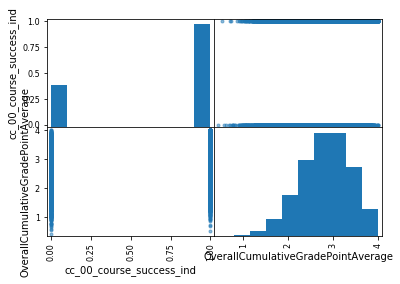

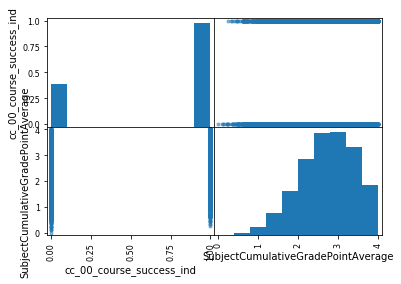

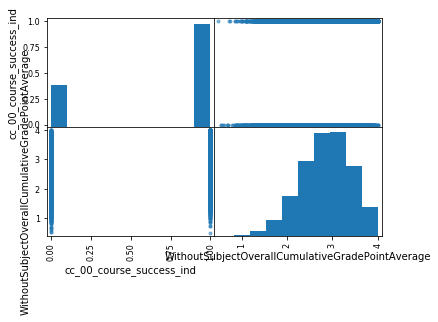

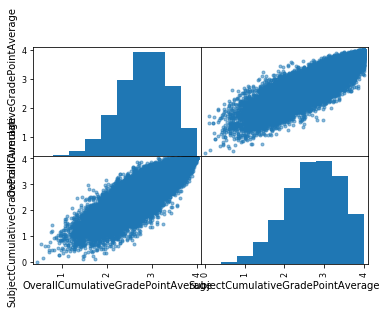

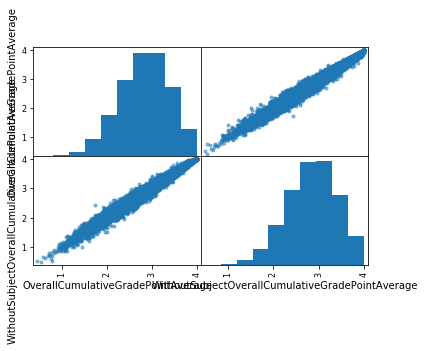

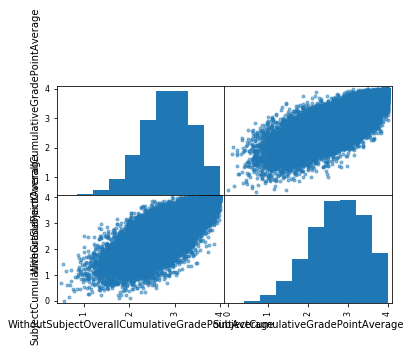

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
matplotlib.interactive(True)

scatter_matrix(English[['cc_00_course_success_ind', 'OverallCumulativeGradePointAverage']]) 
scatter_matrix(English[['cc_00_course_success_ind', 'SubjectCumulativeGradePointAverage']]) 
scatter_matrix(English[['cc_00_course_success_ind', 'WithoutSubjectOverallCumulativeGradePointAverage']]) 
scatter_matrix(English[['OverallCumulativeGradePointAverage', 'SubjectCumulativeGradePointAverage']]) 
scatter_matrix(English[['OverallCumulativeGradePointAverage', 'WithoutSubjectOverallCumulativeGradePointAverage']])
scatter_matrix(English[['WithoutSubjectOverallCumulativeGradePointAverage', 'SubjectCumulativeGradePointAverage']]) 

plt.show()

### This is where Harsha's code starts

In [18]:
from scipy.stats import gaussian_kde
import numpy as np

def samplestrat(df, stratifying_column_name, num_to_sample, maxrows_to_est = 10000, bw_per_range = 50.0, eval_points = 1000 ):
    '''Take a sample of dataframe df stratified by stratifying_column_name
    '''
    strat_col_values = df[stratifying_column_name].values
    samplcol = (df.sample(maxrows_to_est)  if df.shape[0] > maxrows_to_est else df  )[stratifying_column_name].values
    vmin, vmax = min(samplcol), max(samplcol)
    pts = np.linspace(vmin,vmax  ,eval_points) 
    kernel = gaussian_kde( samplcol , bw_method = float(  (vmax - vmin)/bw_per_range  )   )
    density_estim_full = np.interp(strat_col_values, pts , kernel.evaluate(pts) )
    return df.sample(n=num_to_sample, weights = 1/(density_estim_full))

In [19]:
Z0_stratified_sample = samplestrat(English, 'cc_00_course_success_ind',18000)
#Z0_stratified_sample = English

In [20]:
Z0_stratified_sample['cc_00_course_success_ind'].value_counts()

1    10691
0     7309
Name: cc_00_course_success_ind, dtype: int64

In [21]:
#Z0_stratified_sample = pd.get_dummies(Z0_stratified_sample, columns=["IpedsRace","IsDsps","IsEops"])

In [22]:
#import seaborn as sns; 
#sns.set()
#ax = sns.heatmap(Z0_stratified_sample)

In [23]:
#from sklearn.utils import resample
## Separate majority and minority classes
#df_majority = Z0_stratified_sample[Z0_stratified_sample.cc_00_course_success_ind==1]
#df_minority = Z0_stratified_sample[Z0_stratified_sample.cc_00_course_success_ind==0]
 
## Downsample majority class
#df_majority_downsampled = resample(df_majority, 
 #                                replace=False,    # sample without replacement
#                                 n_samples=11000,     # to match minority class
#                                 random_state=123) # reproducible results
 
## Combine minority class with downsampled majority class
#df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
#df_downsampled.cc_00_course_success_ind.value_counts()


#df_downsampled
#Z0_stratified_sample = df_downsampled

#Keeping handy: forced equal classes for df....

In [24]:
Z0_stratified_sample['cc_00_course_success_ind'].value_counts()

1    10691
0     7309
Name: cc_00_course_success_ind, dtype: int64

In [25]:
# seperate our target variable from our main data set to use with sci-kit learn
# delete target variable from df containing main data set
df_target = Z0_stratified_sample[['cc_00_course_success_ind']]
del Z0_stratified_sample['cc_00_course_success_ind']
df_target.head()

,cc_00_course_success_ind
28316,1
38090,0
21464,1
22286,0
54855,0


In [26]:
df_target.shape[0]

18000

In [27]:
# set the variables to X and y for easier reading
X = Z0_stratified_sample
y = df_target

In [28]:
X.shape[0]

18000

In [29]:
X.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage
count,18000.000000,18000.000000,18000.000000
mean,2.790171,2.673996,2.814234
std,0.560540,0.703354,0.554944
min,0.447000,0.000000,0.487000
25%,2.412000,2.210000,2.445000
50%,2.818000,2.717500,2.842000
75%,3.204000,3.213000,3.219000
max,4.000000,4.000000,4.000000


In [30]:
y['cc_00_course_success_ind'].value_counts()

1    10691
0     7309
Name: cc_00_course_success_ind, dtype: int64

In [31]:
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 12345)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=12345, test_size=0.2, train_size=None)


### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

nb_clf_m = GaussianNB()
iter_num=0
# the indices are the rows used for training and testing in each iteration
accuracy_runs = []

for train_indices, test_indices in cv_object.split(X,y): 
    
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
   
    y_train = y_m[train_indices]
    
    y_train = np.ravel(y_train)
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    #sm = SMOTE(random_state=12, ratio = 1.0)
    #sm.fit_sample(X_train, y_train)
    
    nb_clf_m.fit(X_train, y_train)
    y_hat_m = nb_clf_m.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat_m)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(y_test,y_hat_m)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    precision, recall, fscore, support = score(y_test, y_hat_m)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    iter_num+=1

print ('average accuracy: ', np.array(accuracy_runs).mean())

====Iteration 0  ====
accuracy 0.6408333333333334
confusion matrix
 [[ 825  688]
 [ 605 1482]]
precision: [0.57692308 0.68294931]
recall: [0.54527429 0.71011021]
fscore: [0.5606524  0.69626498]
support: [1513 2087]
====Iteration 1  ====
accuracy 0.6591666666666667
confusion matrix
 [[ 841  647]
 [ 580 1532]]
precision: [0.59183673 0.7030748 ]
recall: [0.56518817 0.72537879]
fscore: [0.57820557 0.71405267]
support: [1488 2112]
====Iteration 2  ====
accuracy 0.6505555555555556
confusion matrix
 [[ 780  625]
 [ 633 1562]]
precision: [0.55201699 0.71422039]
recall: [0.55516014 0.71161731]
fscore: [0.5535841  0.71291648]
support: [1405 2195]
====Iteration 3  ====
accuracy 0.6586111111111111
confusion matrix
 [[ 821  641]
 [ 588 1550]]
precision: [0.58268275 0.70743953]
recall: [0.56155951 0.72497661]
fscore: [0.57192616 0.71610072]
support: [1462 2138]
====Iteration 4  ====
accuracy 0.6475
confusion matrix
 [[ 808  681]
 [ 588 1523]]
precision: [0.57879656 0.69101633]
recall: [0.54264607 0.

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import numpy as np
lr_clf_m = LogisticRegression(penalty='l2', C=1.0, class_weight=None,random_state=1234)
iter_num=0
# the indices are the rows used for training and testing in each iteration
accuracy_runs = []

for train_indices, test_indices in cv_object.split(X,y):  
    
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
   
    y_train = y_m[train_indices]
    
    y_train = np.ravel(y_train)
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    #sm = SMOTE(random_state=12, ratio = 1.0)
    #sm.fit_sample(X_train, y_train)
    
    lr_clf_m.fit(X_train, y_train)
    y_hat_m = lr_clf_m.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat_m)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(y_test,y_hat_m)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    precision, recall, fscore, support = score(y_test, y_hat_m)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    iter_num+=1

print ('average accuracy: ', np.array(accuracy_runs).mean())

====Iteration 0  ====
accuracy 0.6472222222222223
confusion matrix
 [[ 662  851]
 [ 419 1668]]
precision: [0.61239593 0.66216753]
recall: [0.43754131 0.79923335]
fscore: [0.51040864 0.72427269]
support: [1513 2087]
====Iteration 1  ====
accuracy 0.6516666666666666
confusion matrix
 [[ 635  853]
 [ 401 1711]]
precision: [0.61293436 0.66731669]
recall: [0.42674731 0.81013258]
fscore: [0.50316957 0.73182207]
support: [1488 2112]
====Iteration 2  ====
accuracy 0.6647222222222222
confusion matrix
 [[ 624  781]
 [ 426 1769]]
precision: [0.59428571 0.69372549]
recall: [0.44412811 0.80592255]
fscore: [0.50835031 0.74562698]
support: [1405 2195]
====Iteration 3  ====
accuracy 0.6569444444444444
confusion matrix
 [[ 623  839]
 [ 396 1742]]
precision: [0.61138371 0.6749322 ]
recall: [0.42612859 0.81478017]
fscore: [0.50221685 0.73829201]
support: [1462 2138]
====Iteration 4  ====
accuracy 0.6419444444444444
confusion matrix
 [[ 606  883]
 [ 406 1705]]
precision: [0.59881423 0.65880989]
recall: [0

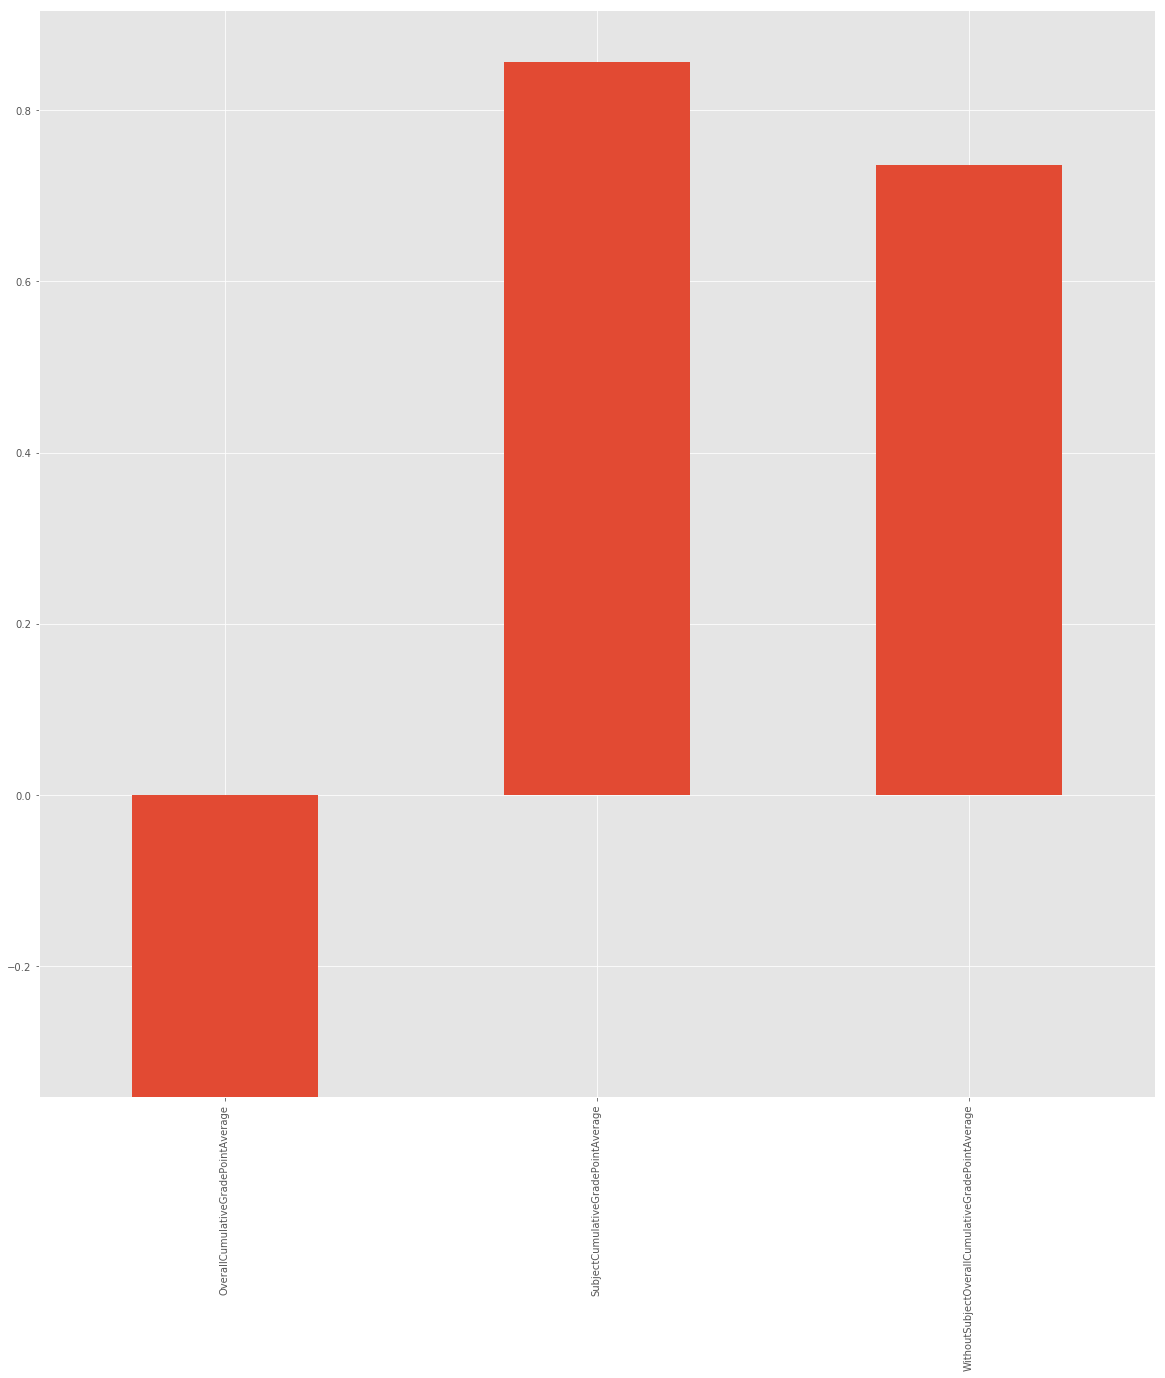

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lr_clf_m.coef_[0],index=Z0_stratified_sample.columns)
weights.plot(kind='bar',figsize=(20,20))
plt.show()

In [35]:
#ANN

In [36]:
# Create X and y sets for ANN
English_X = X
English_y = y
#del English_X['cc_00_course_success_ind']

In [37]:
len_X=int(X.shape[1])

# We are using stratify so sklearn will ensure our test and train sets have the same proportion of responses 0 / 1.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(English_X, English_y, test_size=0.2, random_state=123, stratify=y)

############################ Apply StandardScalar transformation##############
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
#ANN Starts here#############################################################################################

# The issue now is that we need to optimize the weights, just takes testing.

from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
# This one produced acc = 98.94%
classifier.add(Dense(units = 100, kernel_initializer = 'random_uniform', bias_initializer = 'zeros', activation = 'tanh',
                     input_dim = len_X))
#Add hidden layers
classifier.add(Dense(100, activation='relu'))
classifier.add(Dense(50, kernel_initializer='uniform', activation='sigmoid'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'random_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'mae'])
########################### Implement EarlyStopping ##########################################
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Fit classifier
classifier.fit(np.array(X_train), np.array(y_train), batch_size = 2000, epochs = 100, validation_split=0.2)
######################################### Predict on X_test ####################
y_pred = classifier.predict(X_test)
######################################### Calculate the score ####################
score = classifier.evaluate(np.array(X_test), np.array(y_test), batch_size=50)

Using TensorFlow backend.


Train on 11520 samples, validate on 2880 samples
Epoch 1/100
11520/11520 [==============================] - 1s 62us/step - loss: 0.6908 - acc: 0.5266 - mean_absolute_error: 0.4987 - val_loss: 0.6828 - val_acc: 0.5920 - val_mean_absolute_error: 0.4940
Epoch 2/100
11520/11520 [==============================] - 0s 5us/step - loss: 0.6785 - acc: 0.5944 - mean_absolute_error: 0.4906 - val_loss: 0.6737 - val_acc: 0.5920 - val_mean_absolute_error: 0.4859
Epoch 3/100
11520/11520 [==============================] - 0s 5us/step - loss: 0.6698 - acc: 0.5944 - mean_absolute_error: 0.4821 - val_loss: 0.6671 - val_acc: 0.5920 - val_mean_absolute_error: 0.4778
Epoch 4/100
11520/11520 [==============================] - 0s 5us/step - loss: 0.6623 - acc: 0.5944 - mean_absolute_error: 0.4736 - val_loss: 0.6589 - val_acc: 0.5920 - val_mean_absolute_error: 0.4690

In [39]:
# Print out results of ANN
print("%s of Testing: %.2f%%" % (classifier.metrics_names[1], score[1] ))
print("%s of Training: %.2f%%" % (classifier.metrics_names[1], score[0]))
print("%s: %.2f%%" % (classifier.metrics_names[2], score[2] ))
print("Score", score)

acc of Testing: 0.66%
acc of Training: 0.62%
mean_absolute_error: 0.43%
Score [0.615821946826246, 0.655833340353436, 0.42539644034372437]


precision: [0.59268495 0.68752607]
recall: [0.4876881  0.77081384]
fscore: [0.53508443 0.72679162]
support: [1462 2138]
[[  71 1391]
 [  20 2118]]
precision [0.59388889 0.59377605 0.59366315 ... 0.8        0.75       1.        ]
recall [1.         0.99953227 0.99906455 ... 0.00187091 0.00140318 0.        ]
thresholds [0.25506797 0.25700486 0.25929597 ... 0.8974721  0.8976247  0.89815384]
Average precision-recall score: 0.76


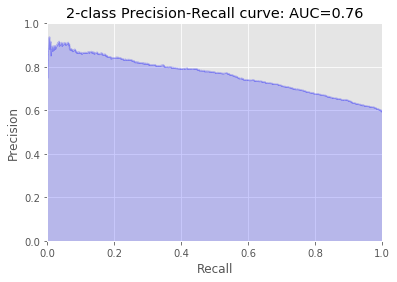

In [40]:
#################################################################################
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred>0.5)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


######################################### Confusion Matrix ####################

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred>.3)
#print("summary",classifier.metrics_names)
print (cm.view())

######################### Precision Recall Curve################
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
print('precision', precision)
print('recall', recall)
print('thresholds',thresholds)
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
################################################


### SVM

In [41]:
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()

/Users/Harsha/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.6486111111111111
confusion matrix
[[ 653  860]
 [ 405 1682]]


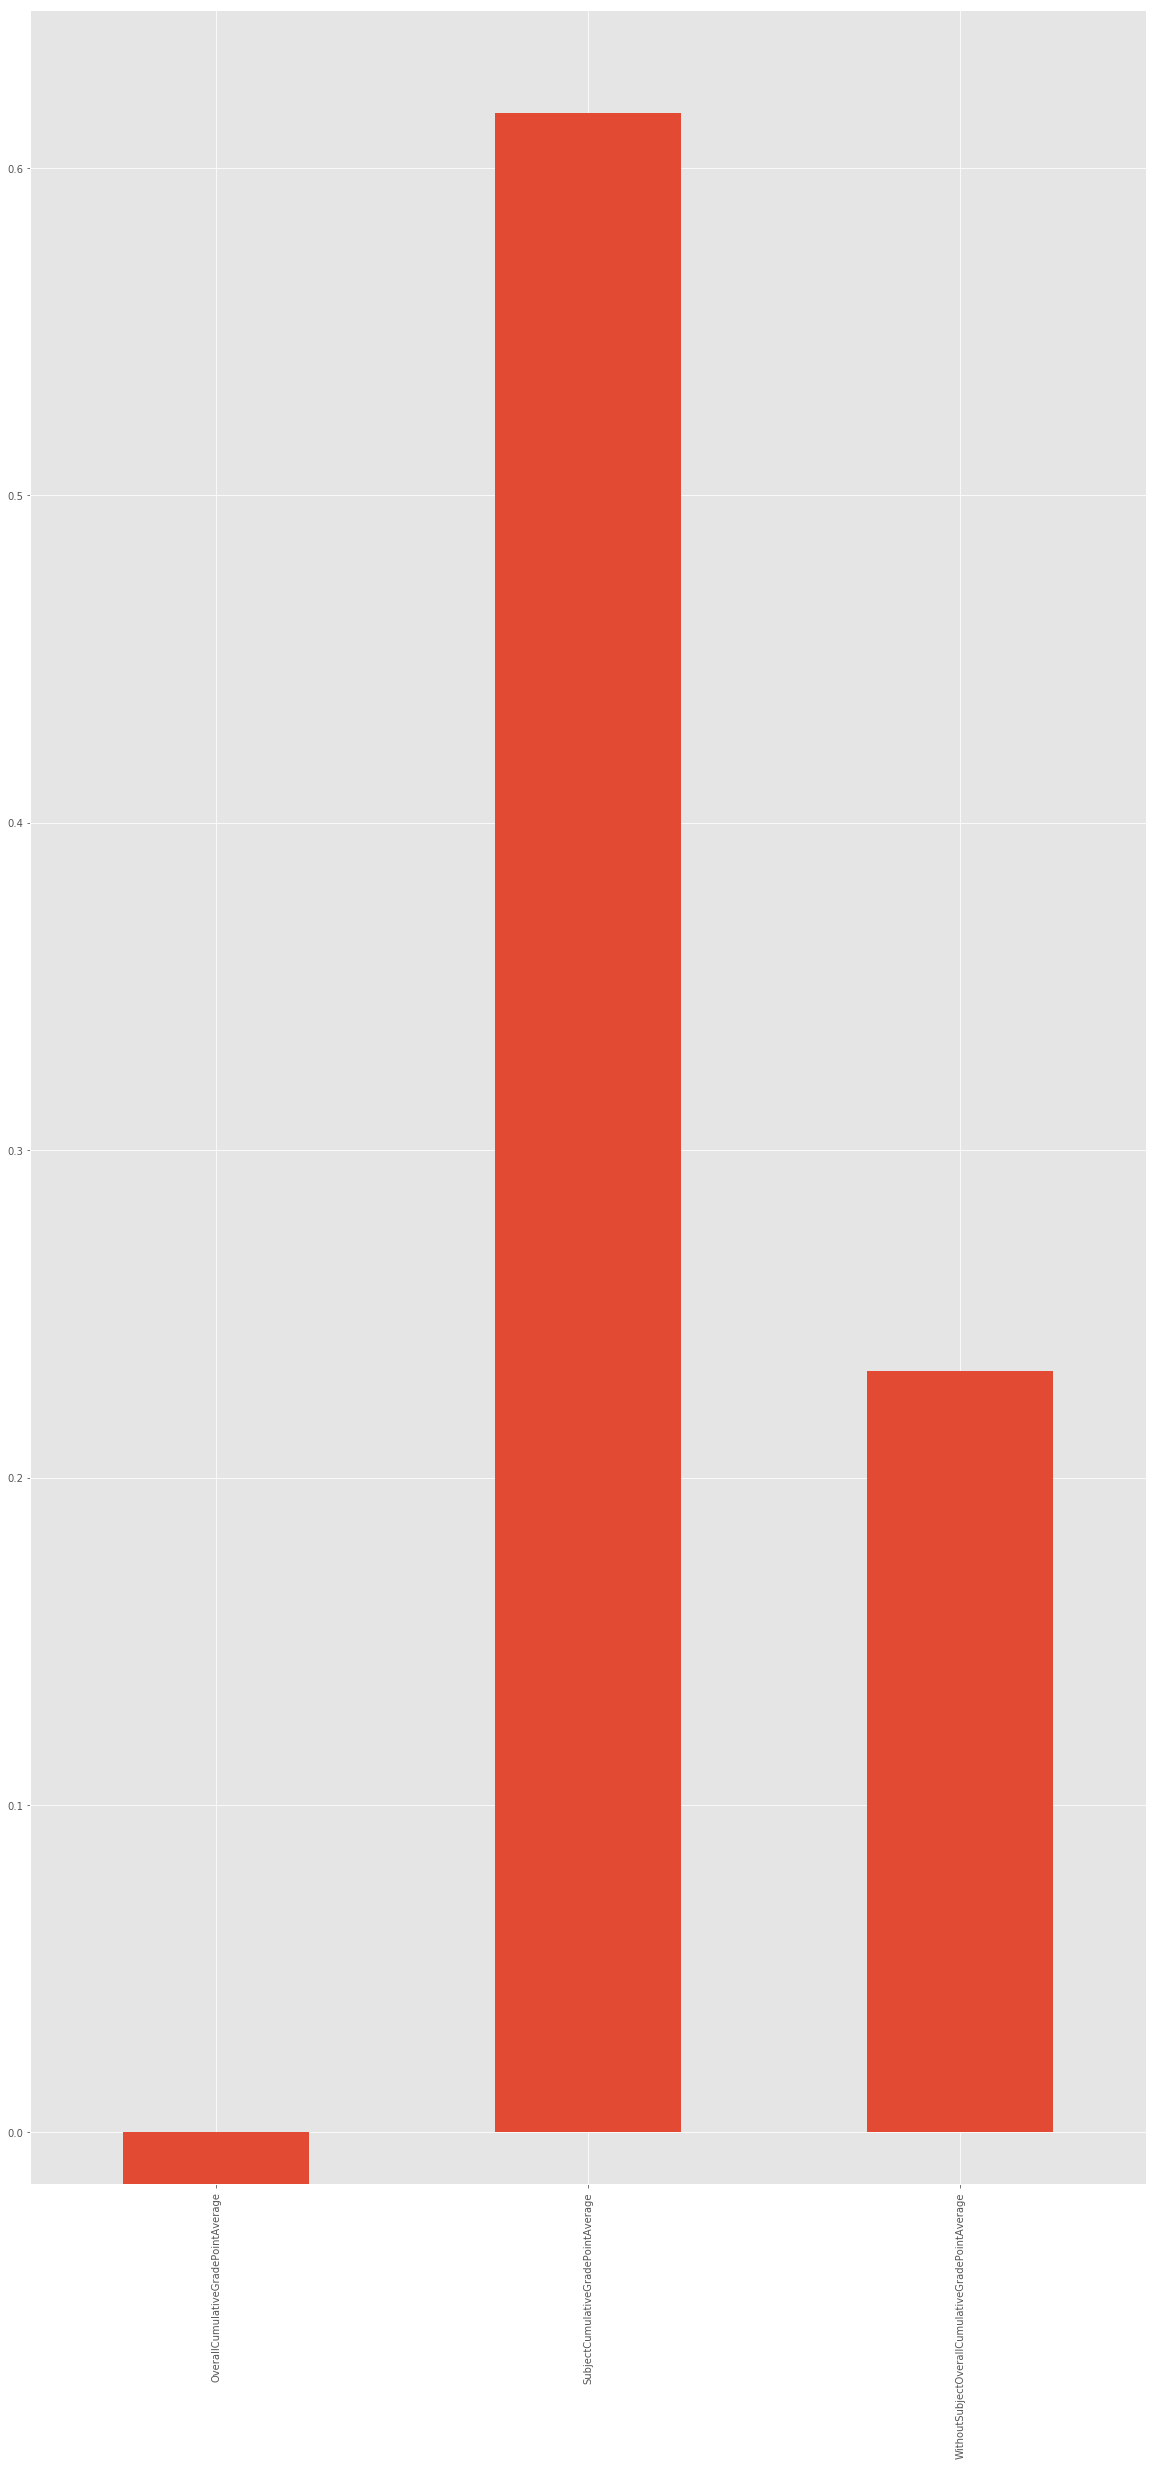

accuracy 0.6505555555555556
confusion matrix
[[ 632  856]
 [ 402 1710]]


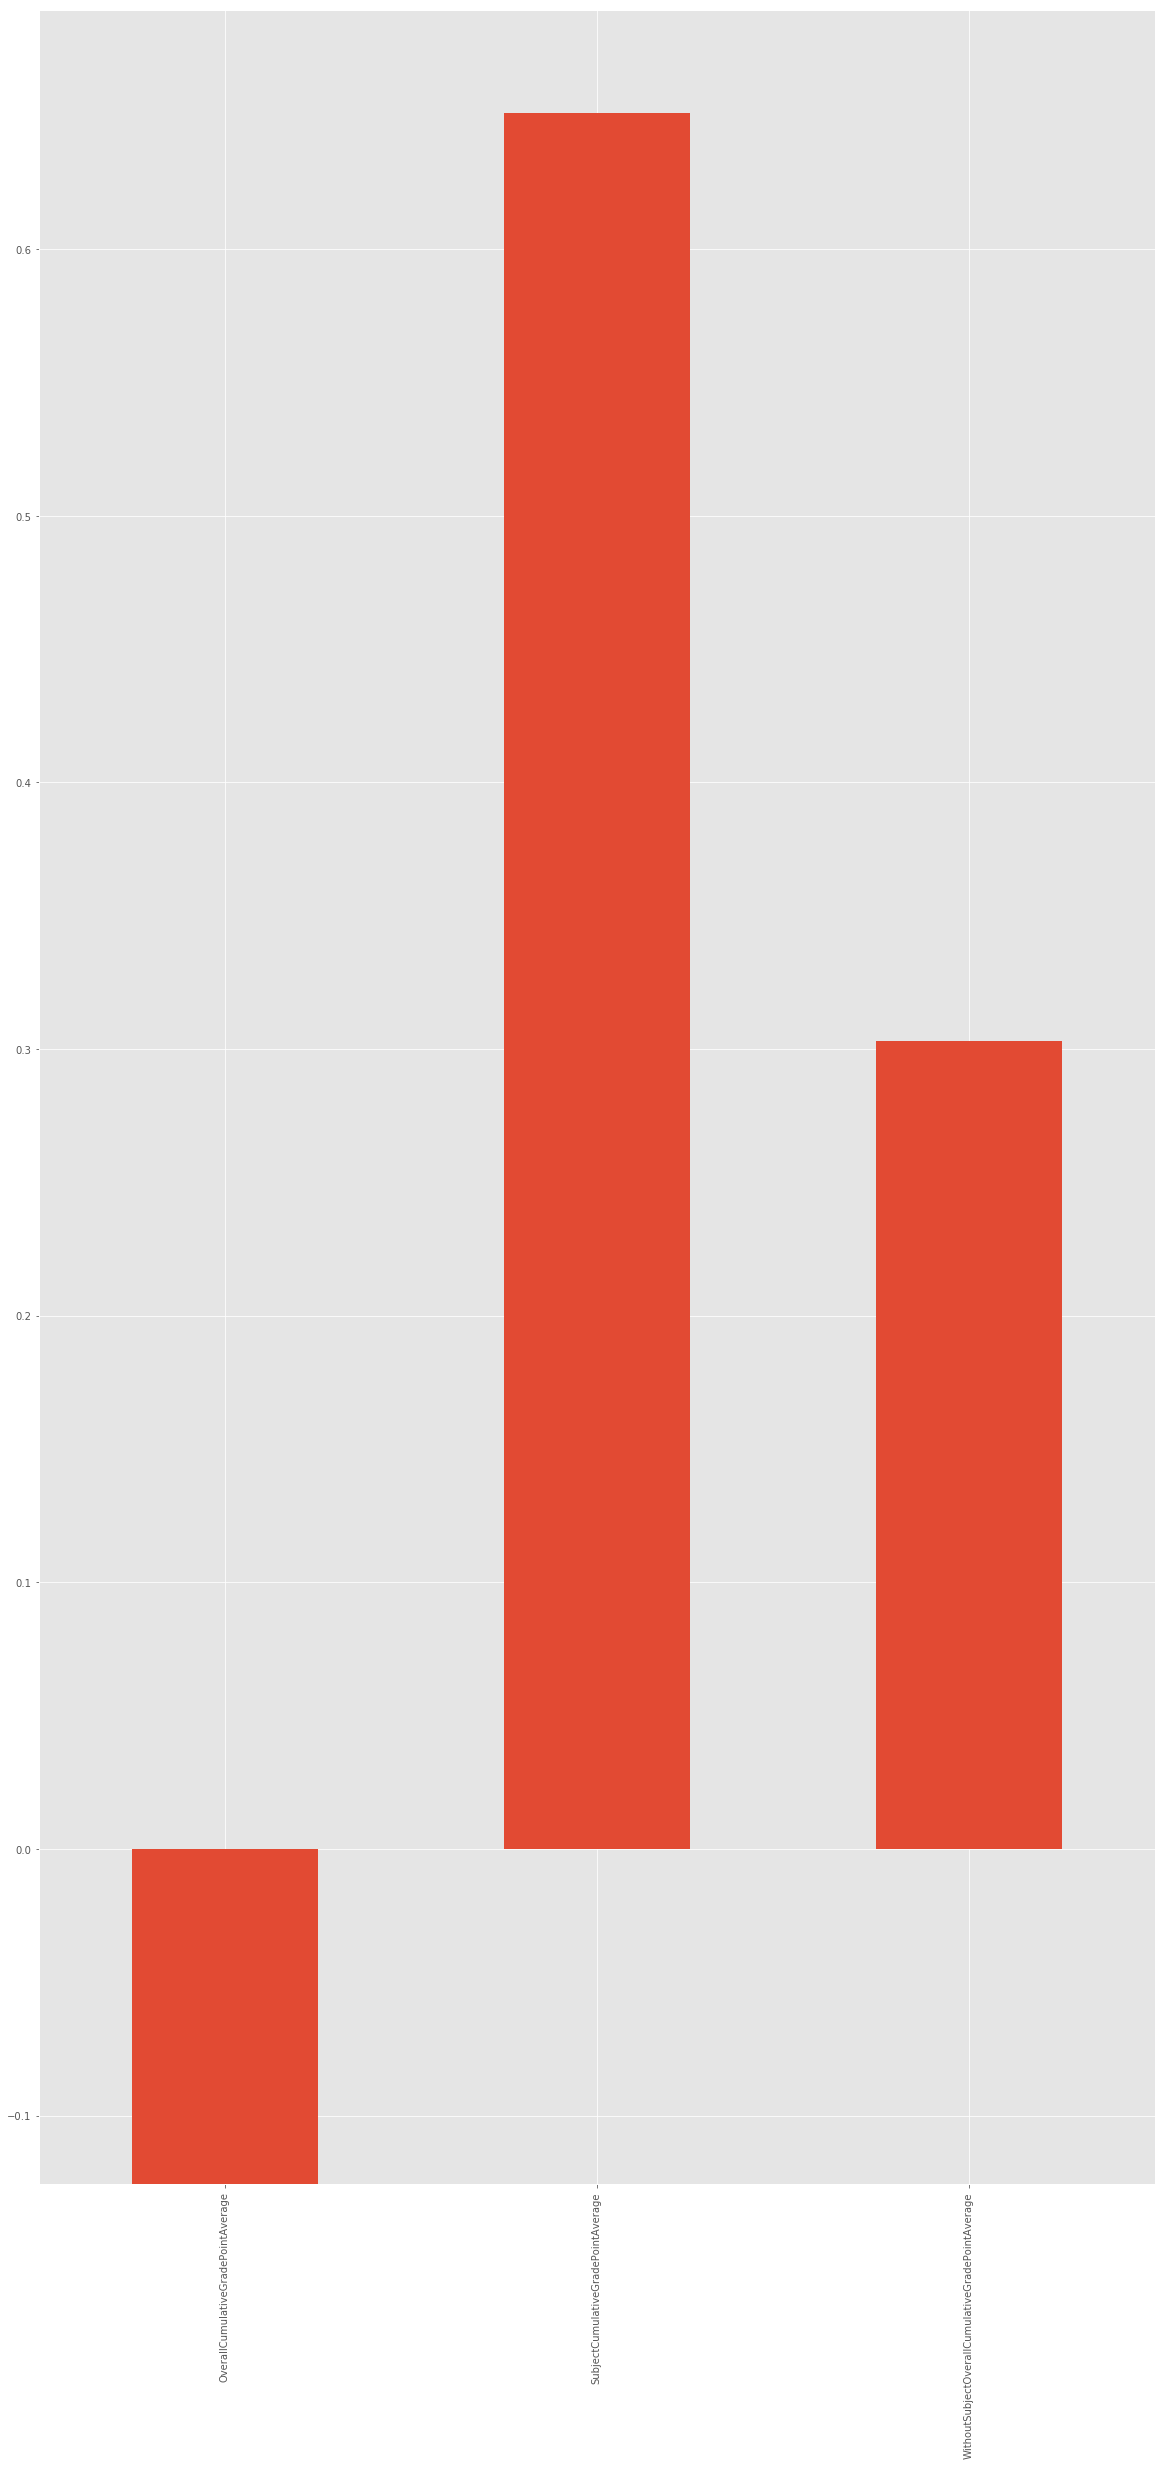

accuracy 0.6641666666666667
confusion matrix
[[ 624  781]
 [ 428 1767]]


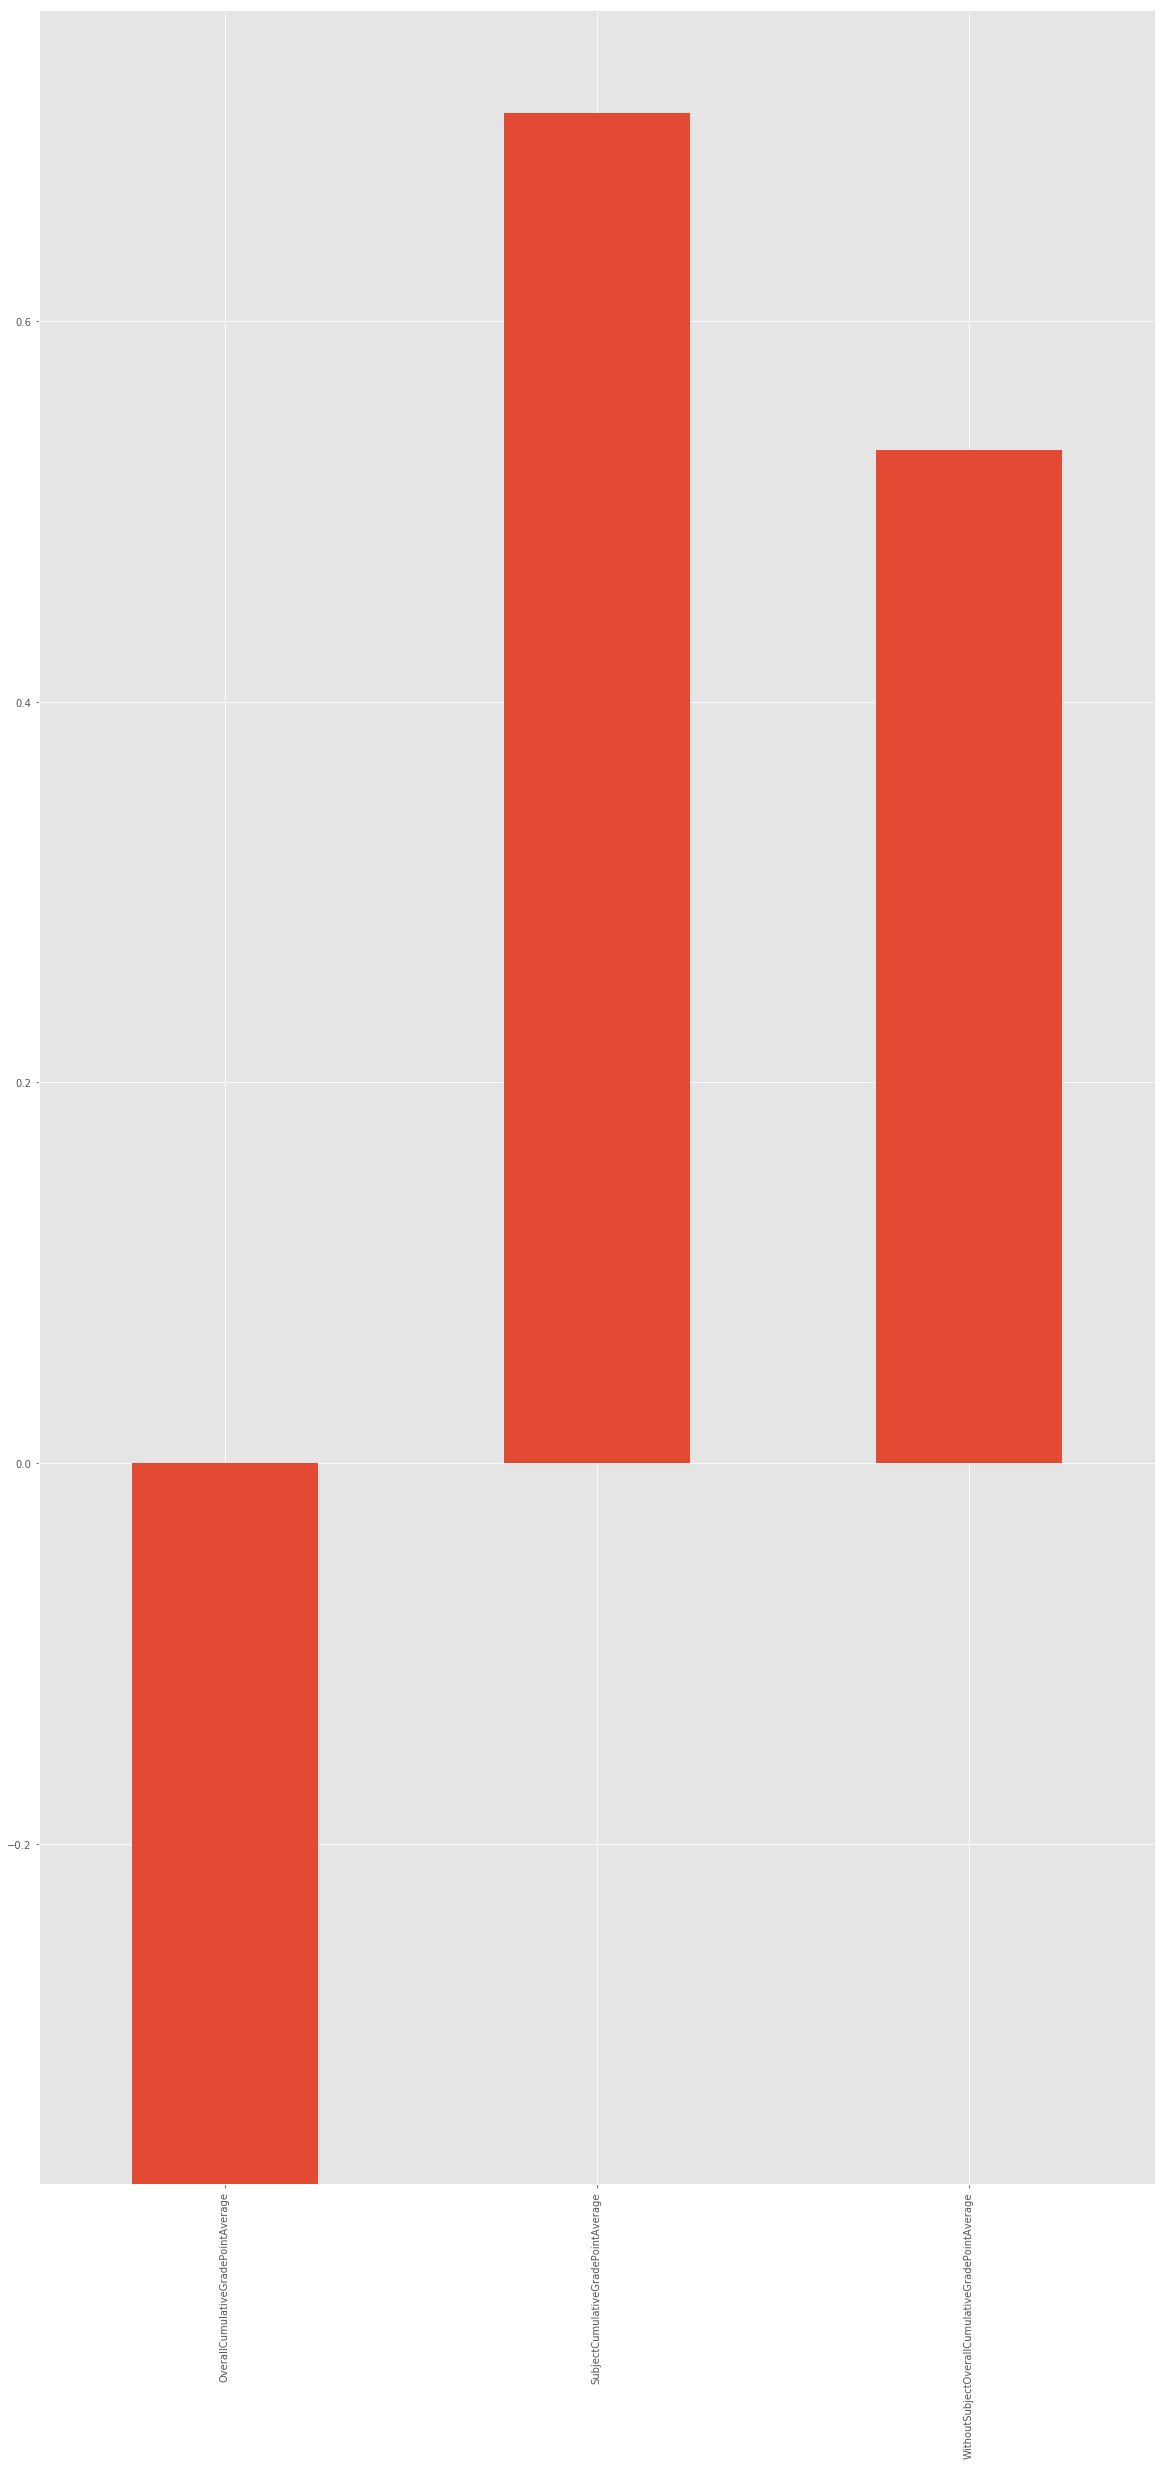

accuracy 0.6586111111111111
confusion matrix
[[ 622  840]
 [ 389 1749]]


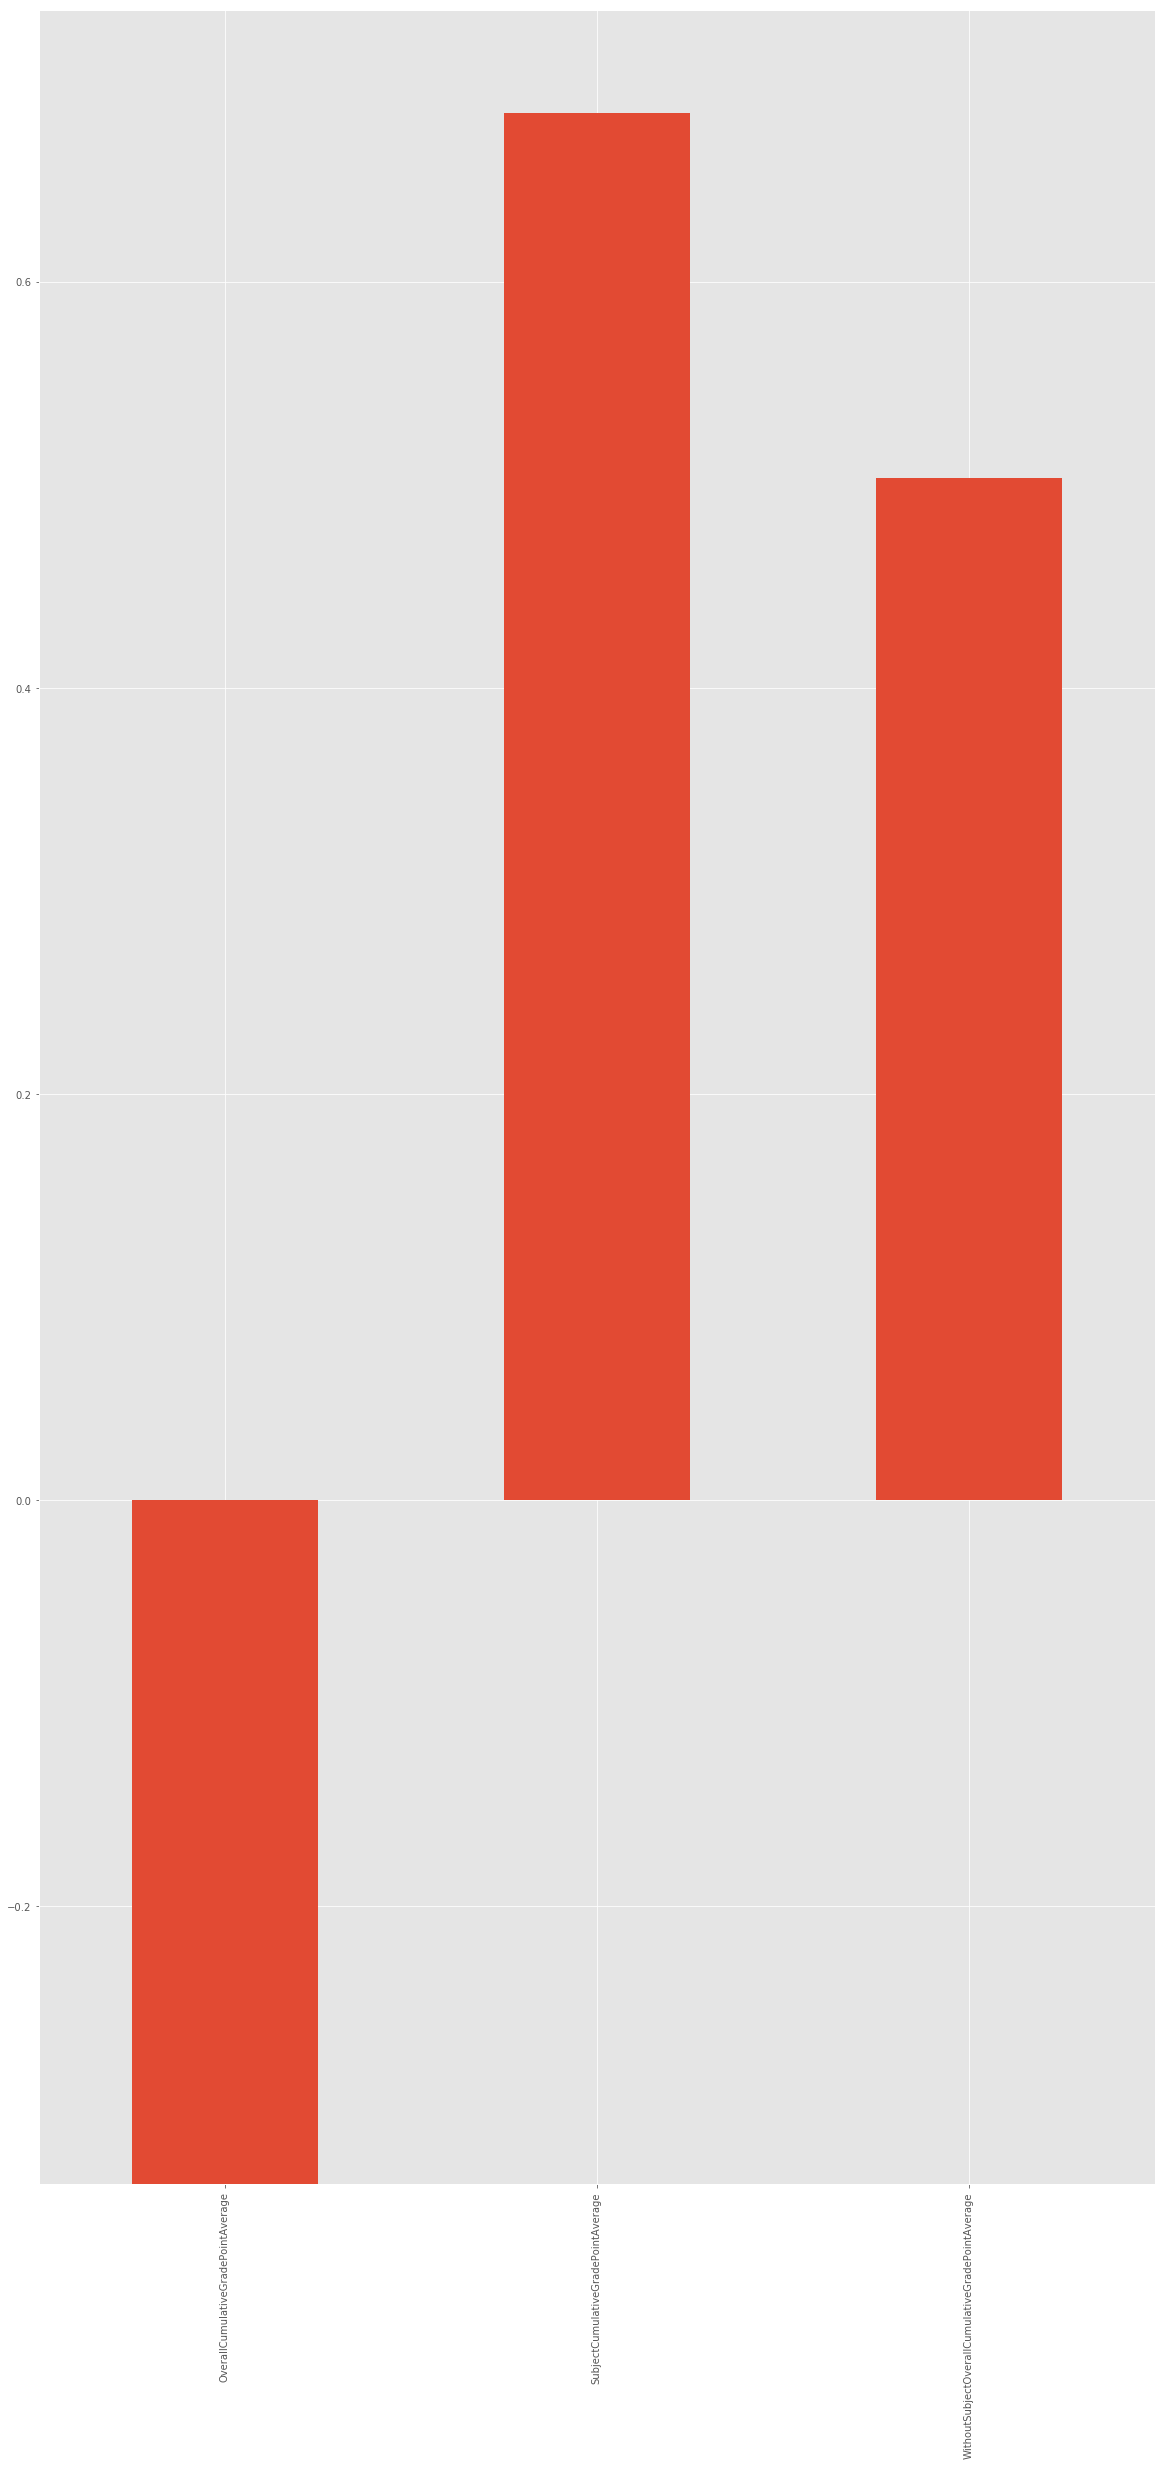

accuracy 0.6436111111111111
confusion matrix
[[ 604  885]
 [ 398 1713]]


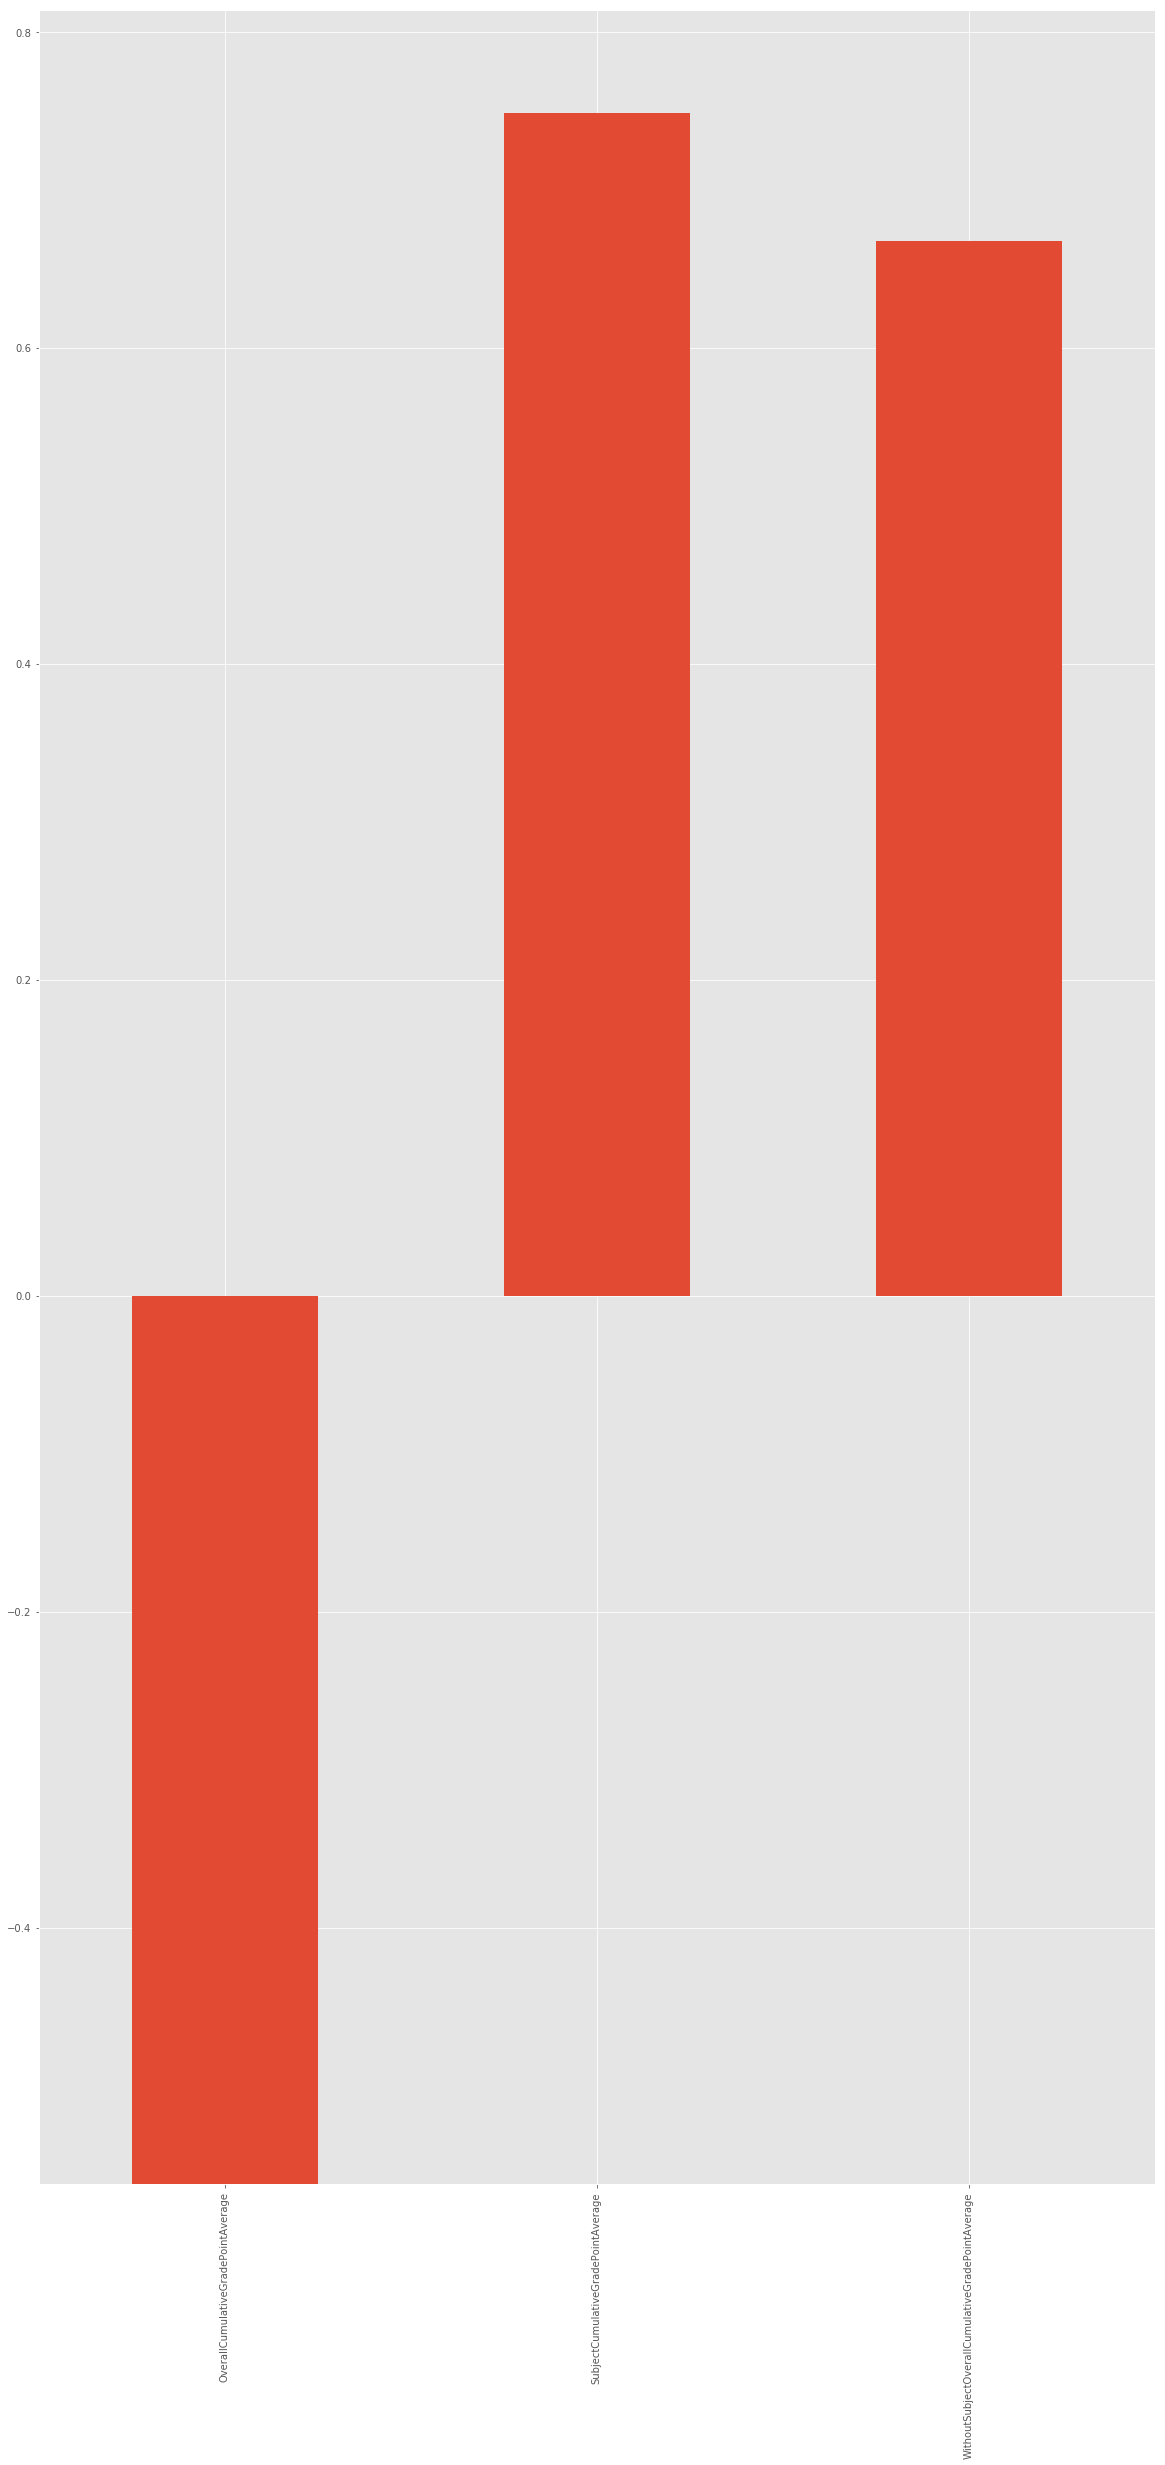

accuracy 0.6552777777777777
confusion matrix
[[ 593  826]
 [ 415 1766]]


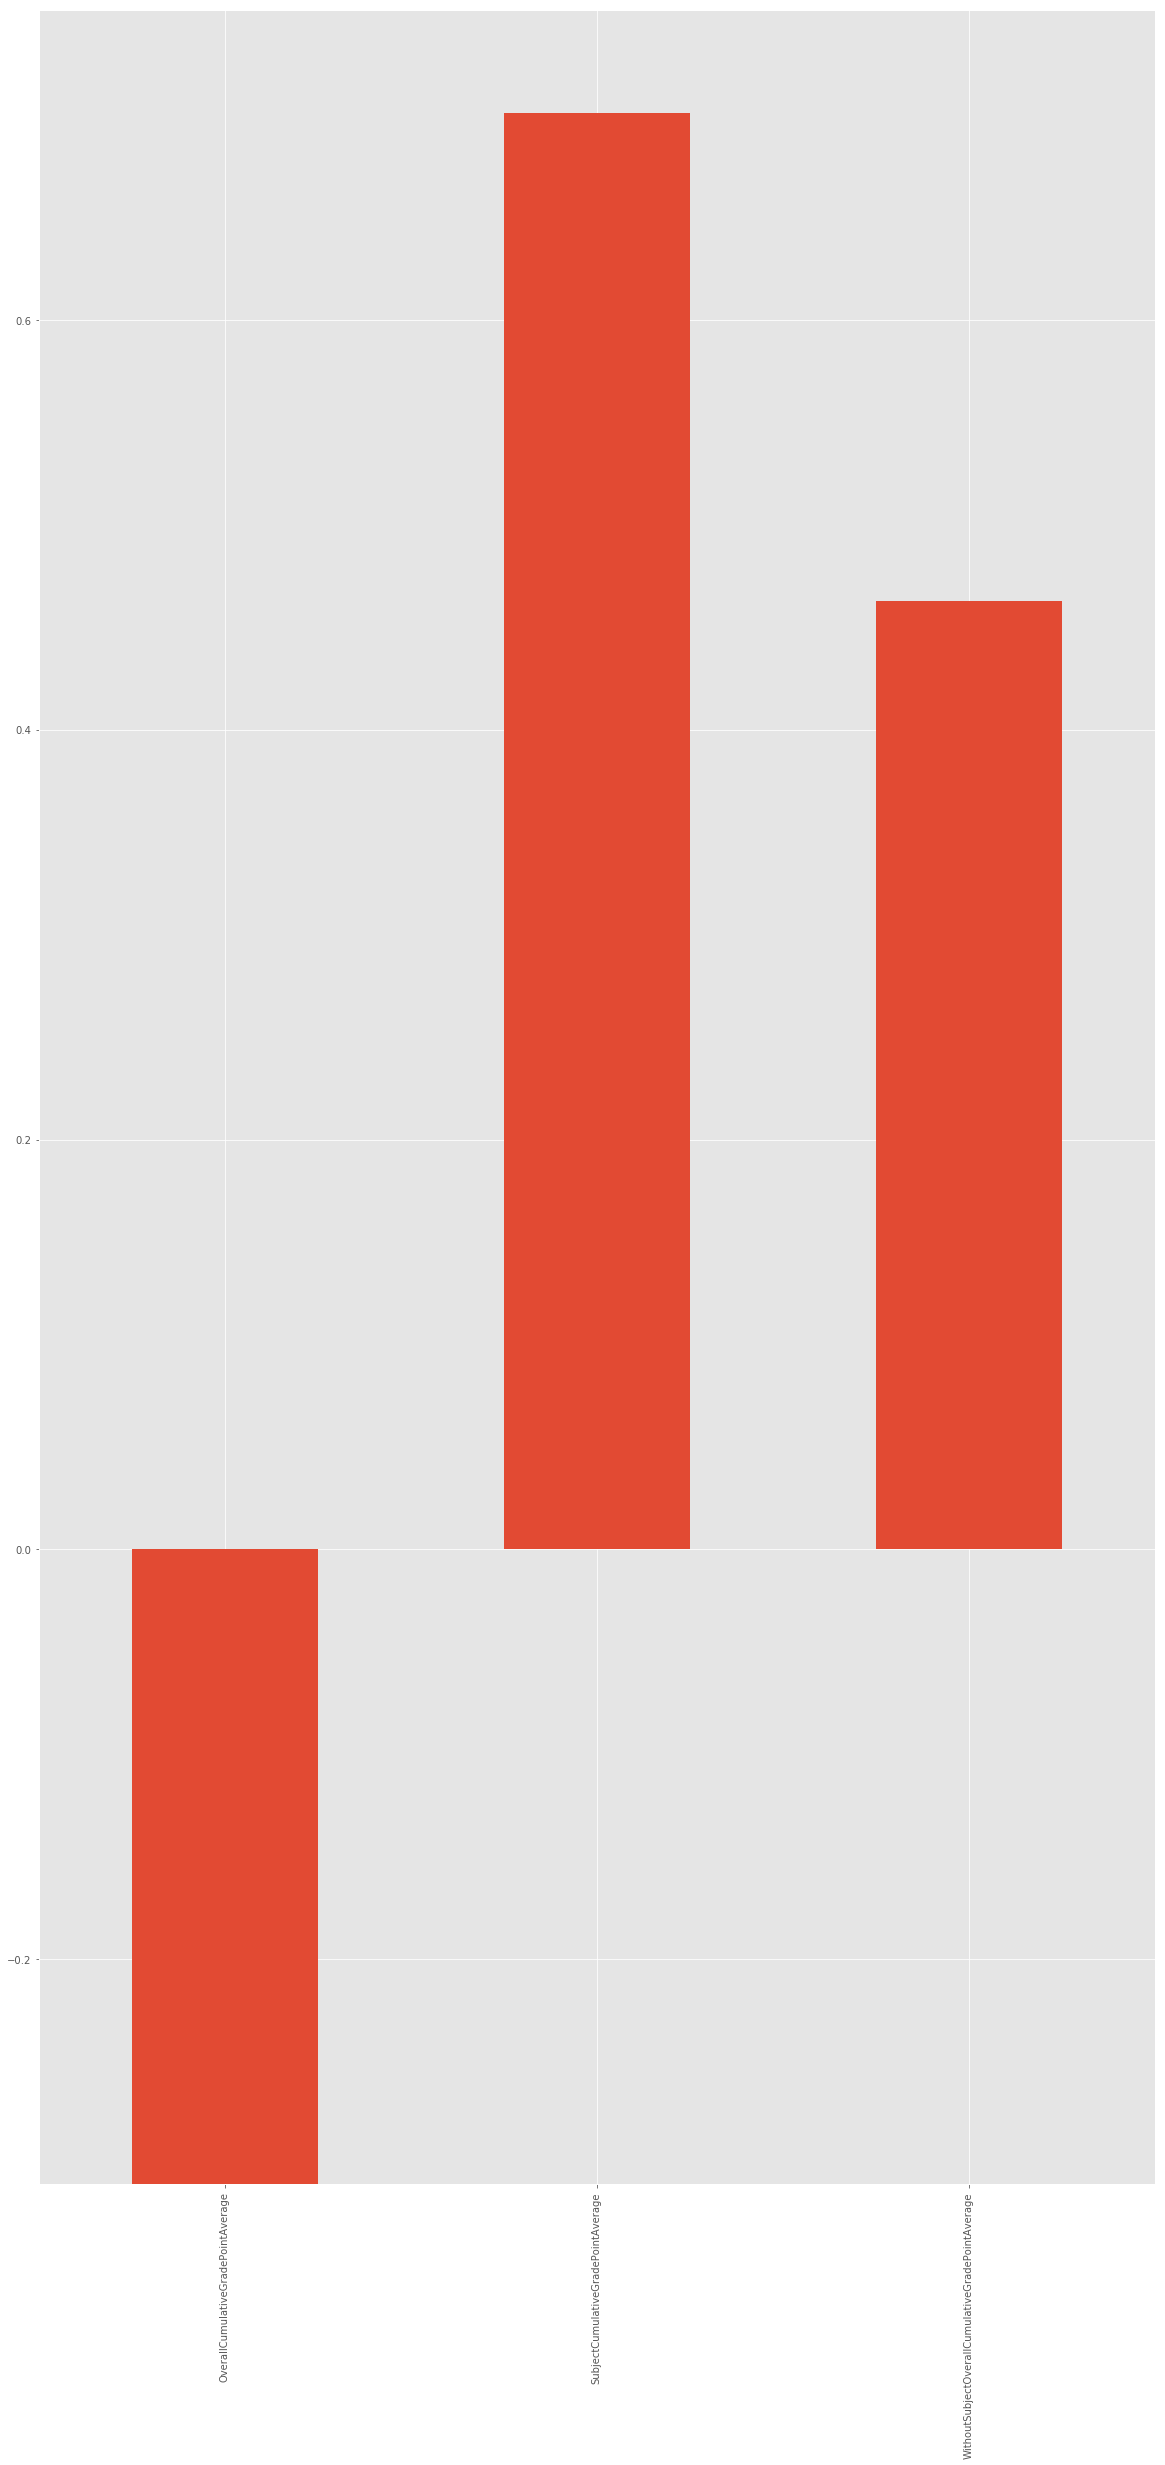

accuracy 0.6527777777777778
confusion matrix
[[ 622  846]
 [ 404 1728]]


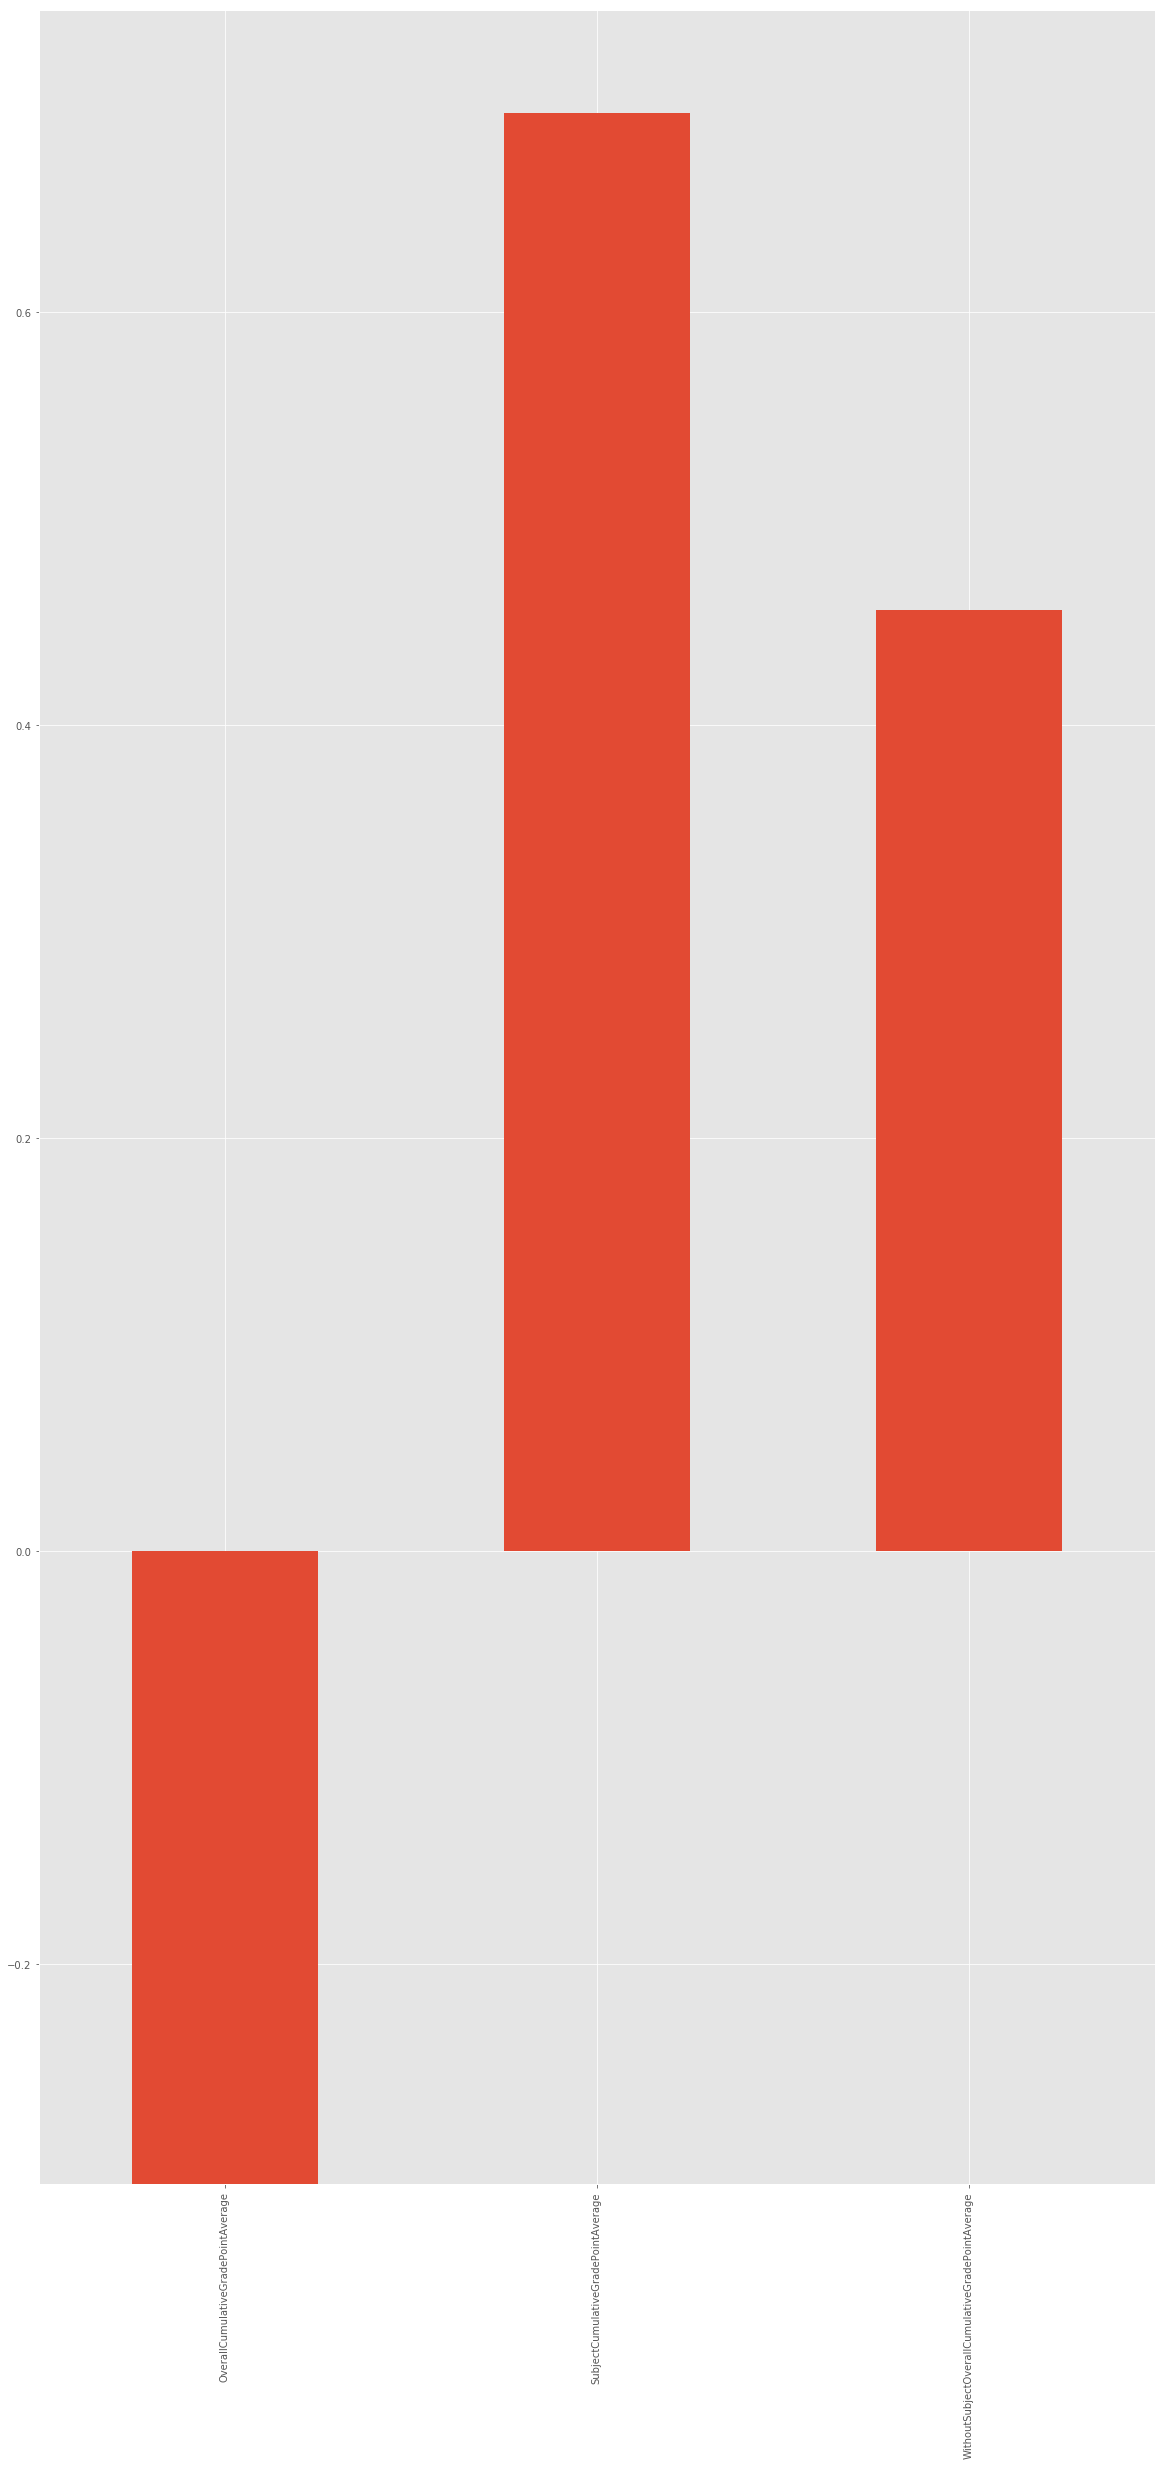

accuracy 0.6641666666666667
confusion matrix
[[ 627  840]
 [ 369 1764]]


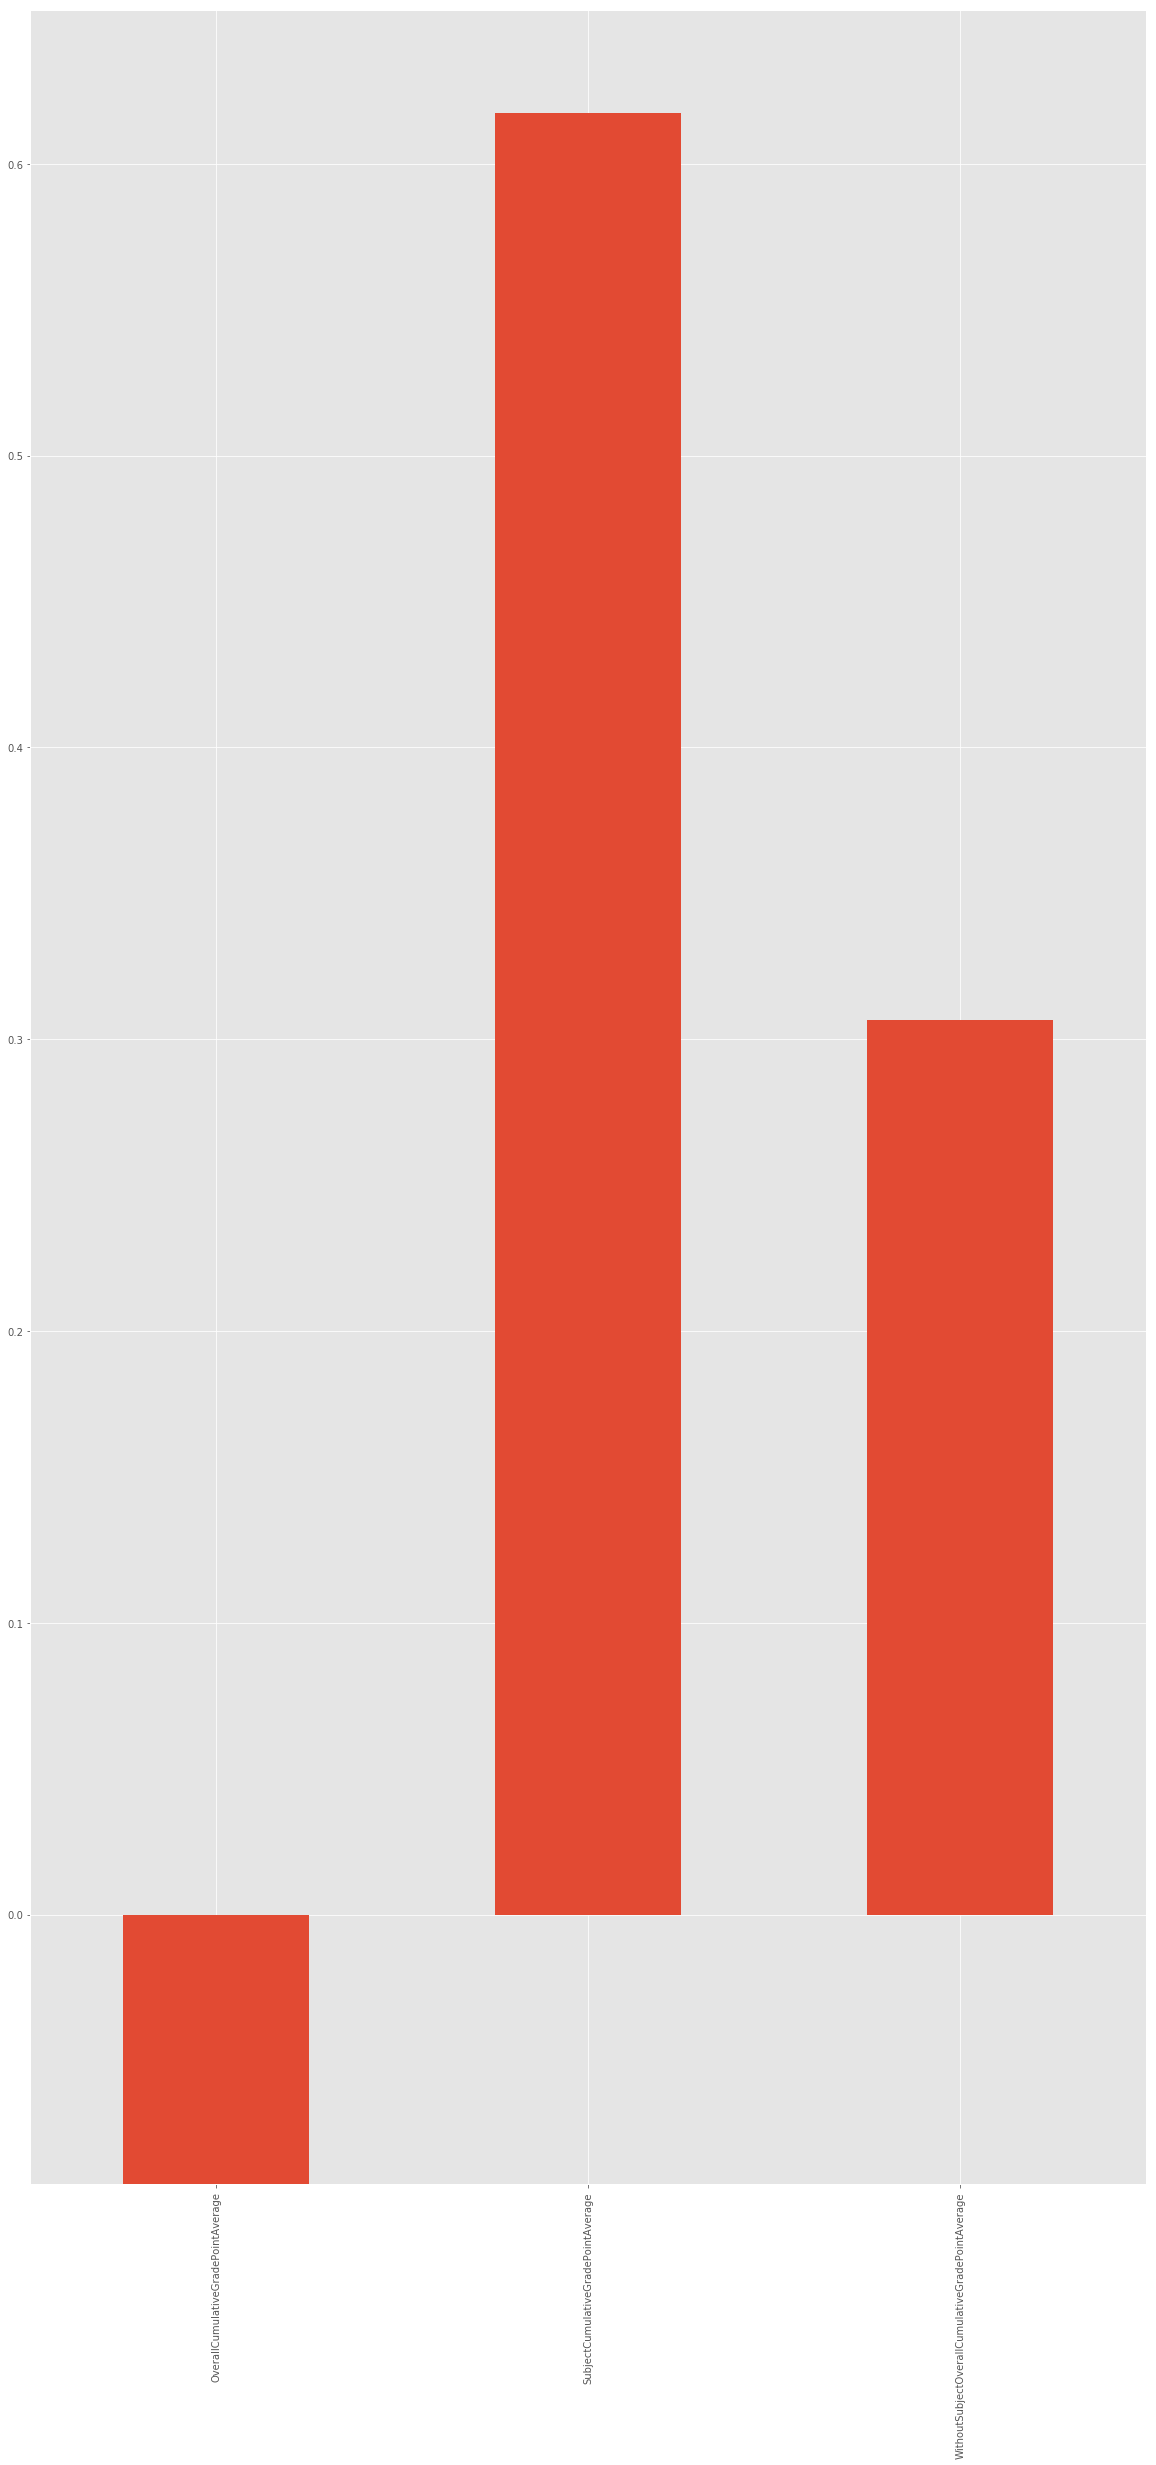

accuracy 0.6441666666666667
confusion matrix
[[ 617  890]
 [ 391 1702]]


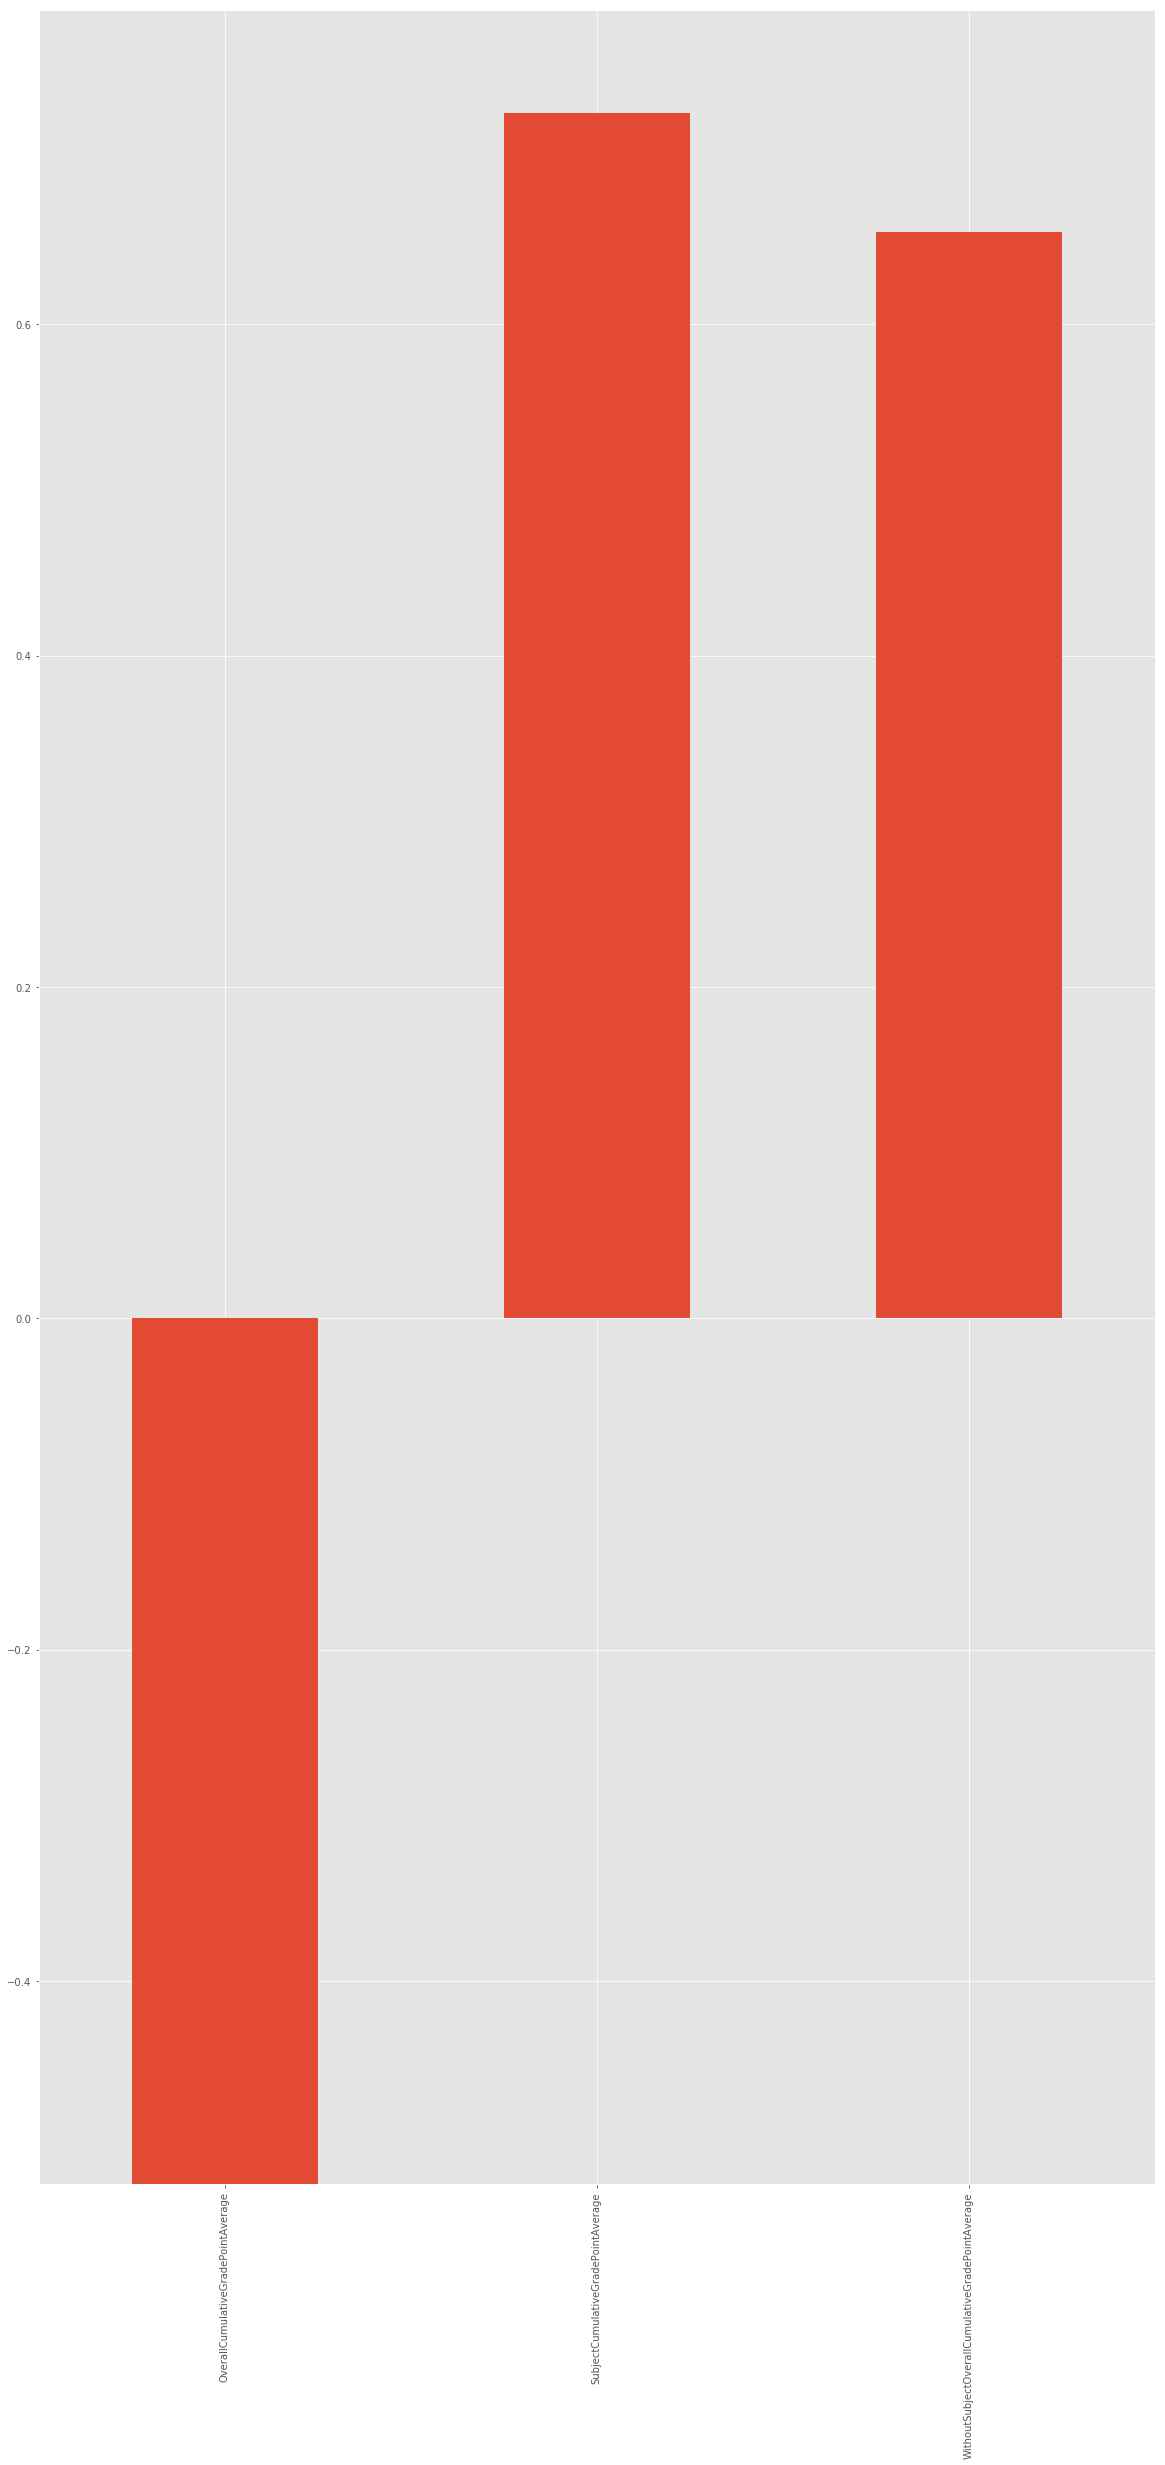

accuracy 0.6575
confusion matrix
[[ 605  835]
 [ 398 1762]]


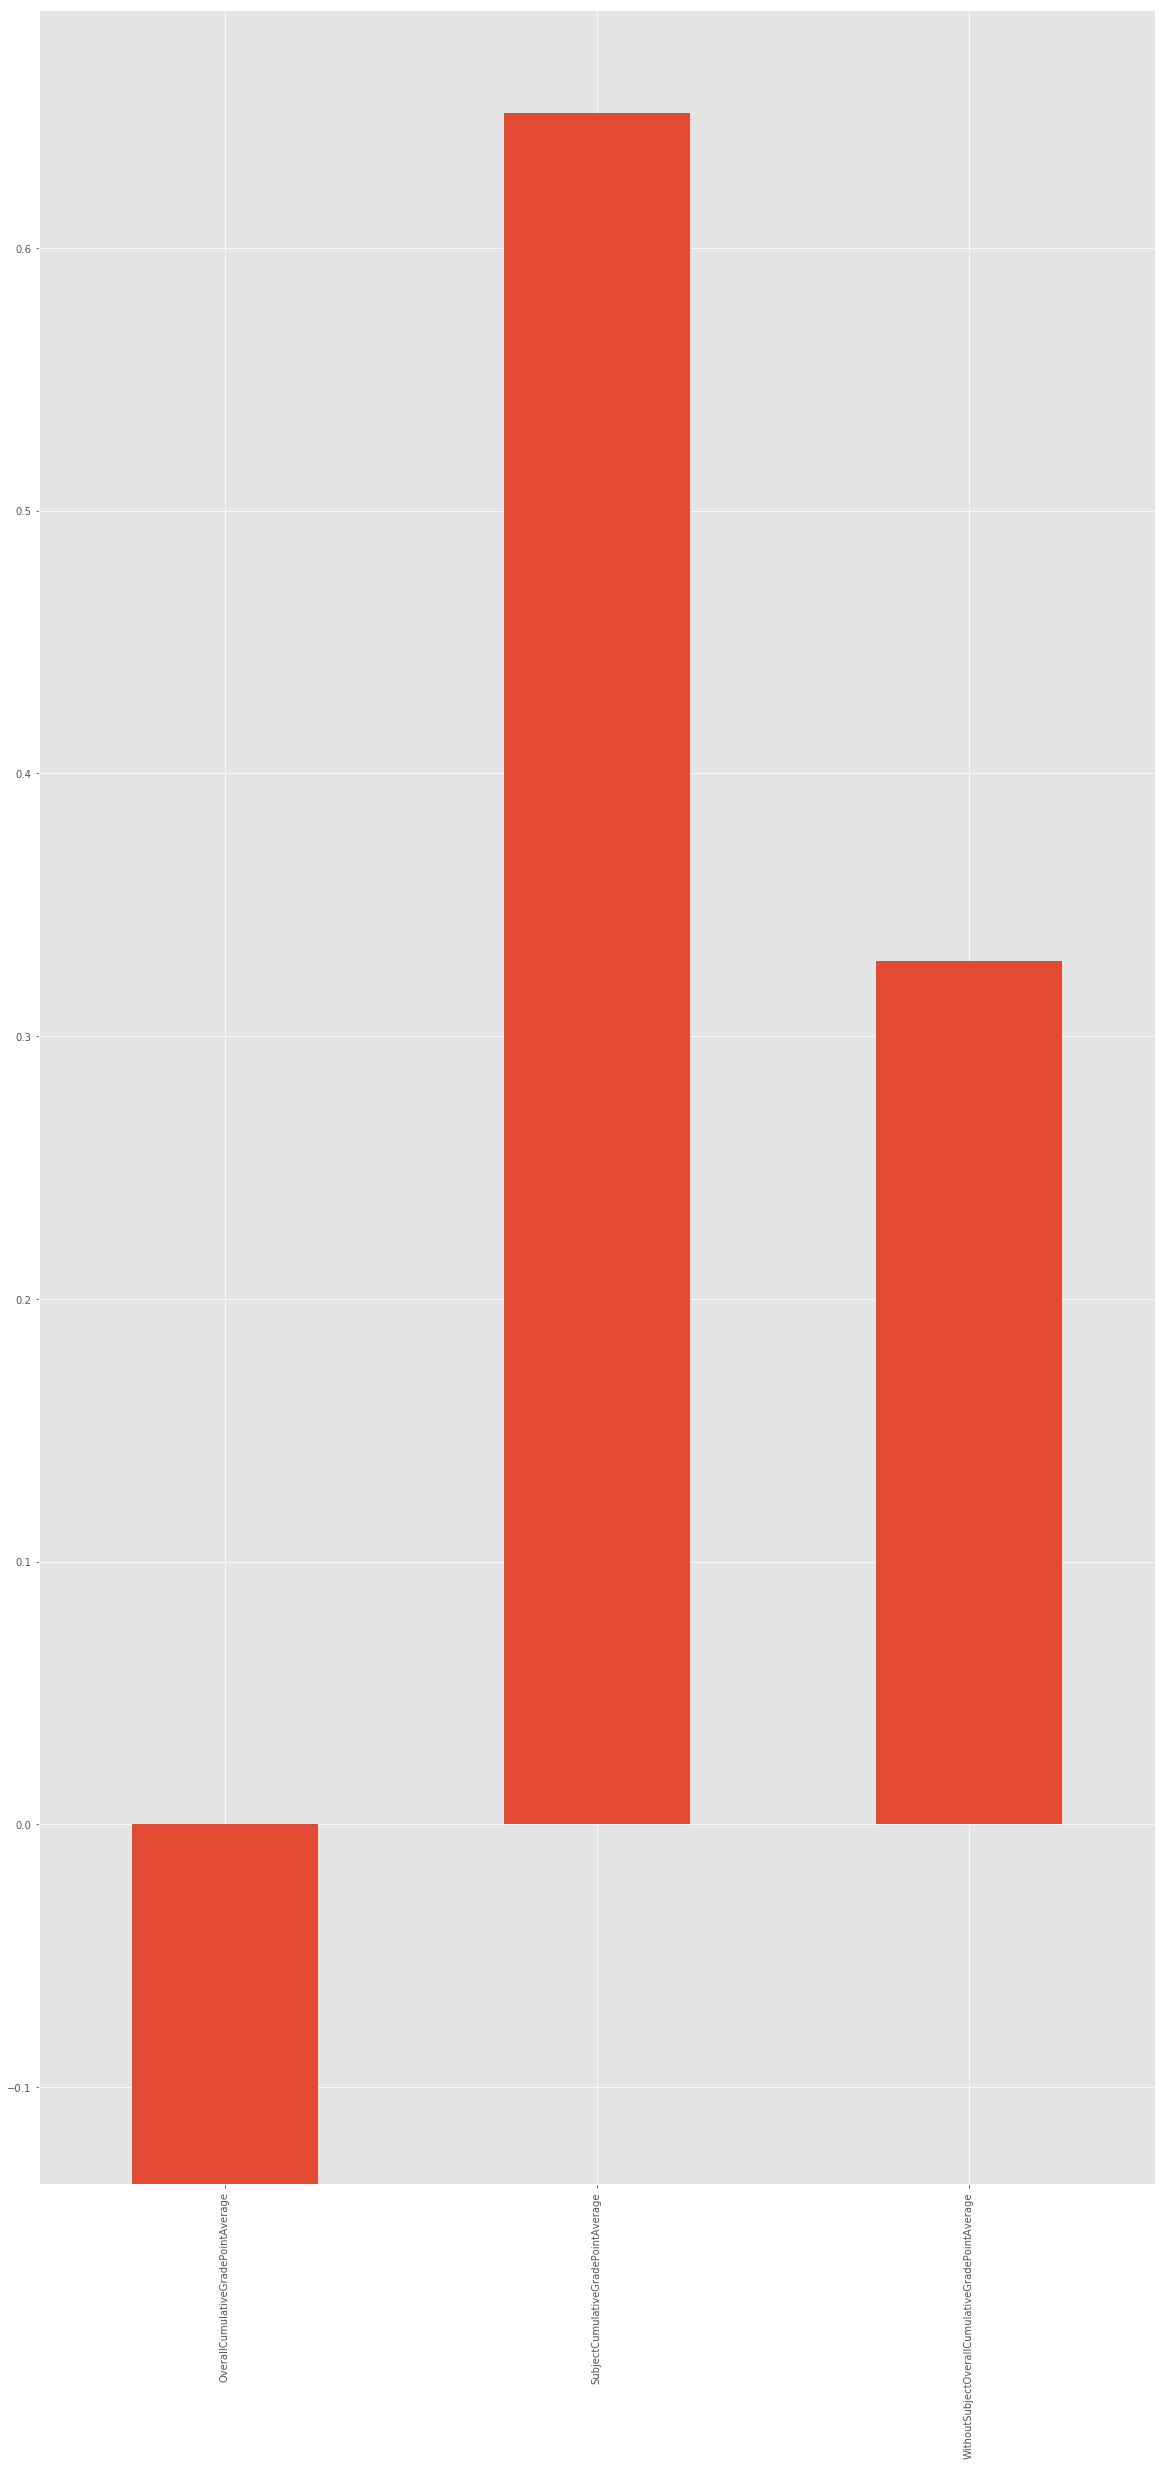

In [42]:
from sklearn.svm import SVC
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
    y_train = y_m[train_indices]
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test)
    svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("accuracy", acc )
    print("confusion matrix")
    print(conf)
   
    weights = pd.Series(svm_clf.coef_[0],index=Z0_stratified_sample.columns)
    weights.plot(kind='bar',figsize=(20,40))
    plt.show()
    train_indicies_linear = train_indices
    support = svm_clf.support_

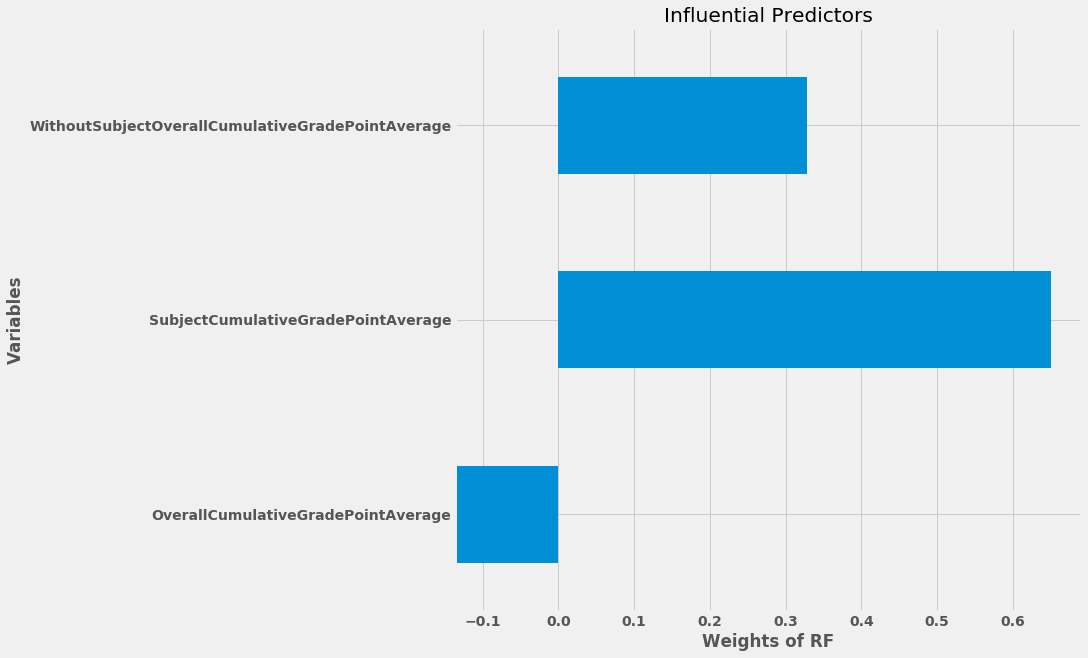

In [43]:
import math
weights2 = weights[abs(weights) > .1]

# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
weights.plot.barh(figsize=(10,10))
plt.title("Influential Predictors")
plt.xlabel('Weights of RF')
plt.ylabel('Variables')

plt.show()

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 20, 
                                min_samples_leaf=5, min_samples_split=5,max_leaf_nodes = 62,
                               max_features= None,random_state=1234)
accuracy_runs = []
# now get the training and testing
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    # train the decision tree algorithm
    dt_clf.fit(X_train,y_train)
    classe_names = dt_clf.classes_
    print (classe_names)
    digital_label = ['zero', 'one']
    print (digital_label)
    
    from sklearn import tree
    from sklearn.externals.six import StringIO  
    import pydot 



    dot_data = StringIO() 
    tree.export_graphviz(dt_clf, out_file=dot_data, feature_names= X.columns,  
                    class_names=digital_label )
    
    #print ( dot_data.getvalue() )
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

    graph[0].write_pdf("EnglishDecisionTree.pdf")
    
    
     
    
    
    
    
    yhat = dt_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

[0 1]
['zero', 'one']
accuracy: 0.6558333333333334
precision: [0.58085278 0.69537548]
recall: [0.50138889 0.7587963 ]
fscore: [0.5382035 0.7257029]
support: [1440 2160]
[0 1]
['zero', 'one']
accuracy: 0.6558333333333334
precision: [0.58085278 0.69537548]
recall: [0.50138889 0.7587963 ]
fscore: [0.5382035 0.7257029]
support: [1440 2160]
[0 1]
['zero', 'one']
accuracy: 0.6558333333333334
precision: [0.58085278 0.69537548]
recall: [0.50138889 0.7587963 ]
fscore: [0.5382035 0.7257029]
support: [1440 2160]
[0 1]
['zero', 'one']
accuracy: 0.6558333333333334
precision: [0.58085278 0.69537548]
recall: [0.50138889 0.7587963 ]
fscore: [0.5382035 0.7257029]
support: [1440 2160]
[0 1]
['zero', 'one']
accuracy: 0.6558333333333334
precision: [0.58085278 0.69537548]
recall: [0.50138889 0.7587963 ]
fscore: [0.5382035 0.7257029]
support: [1440 2160]
[0 1]
['zero', 'one']
accuracy: 0.6558333333333334
precision: [0.58085278 0.69537548]
recall: [0.50138889 0.7587963 ]
fscore: [0.5382035 0.7257029]
support

WithoutSubjectOverallCumulativeGradePointAverage has importance of 0.04315300602084461
OverallCumulativeGradePointAverage has importance of 0.1619309574775295
SubjectCumulativeGradePointAverage has importance of 0.794916036501626


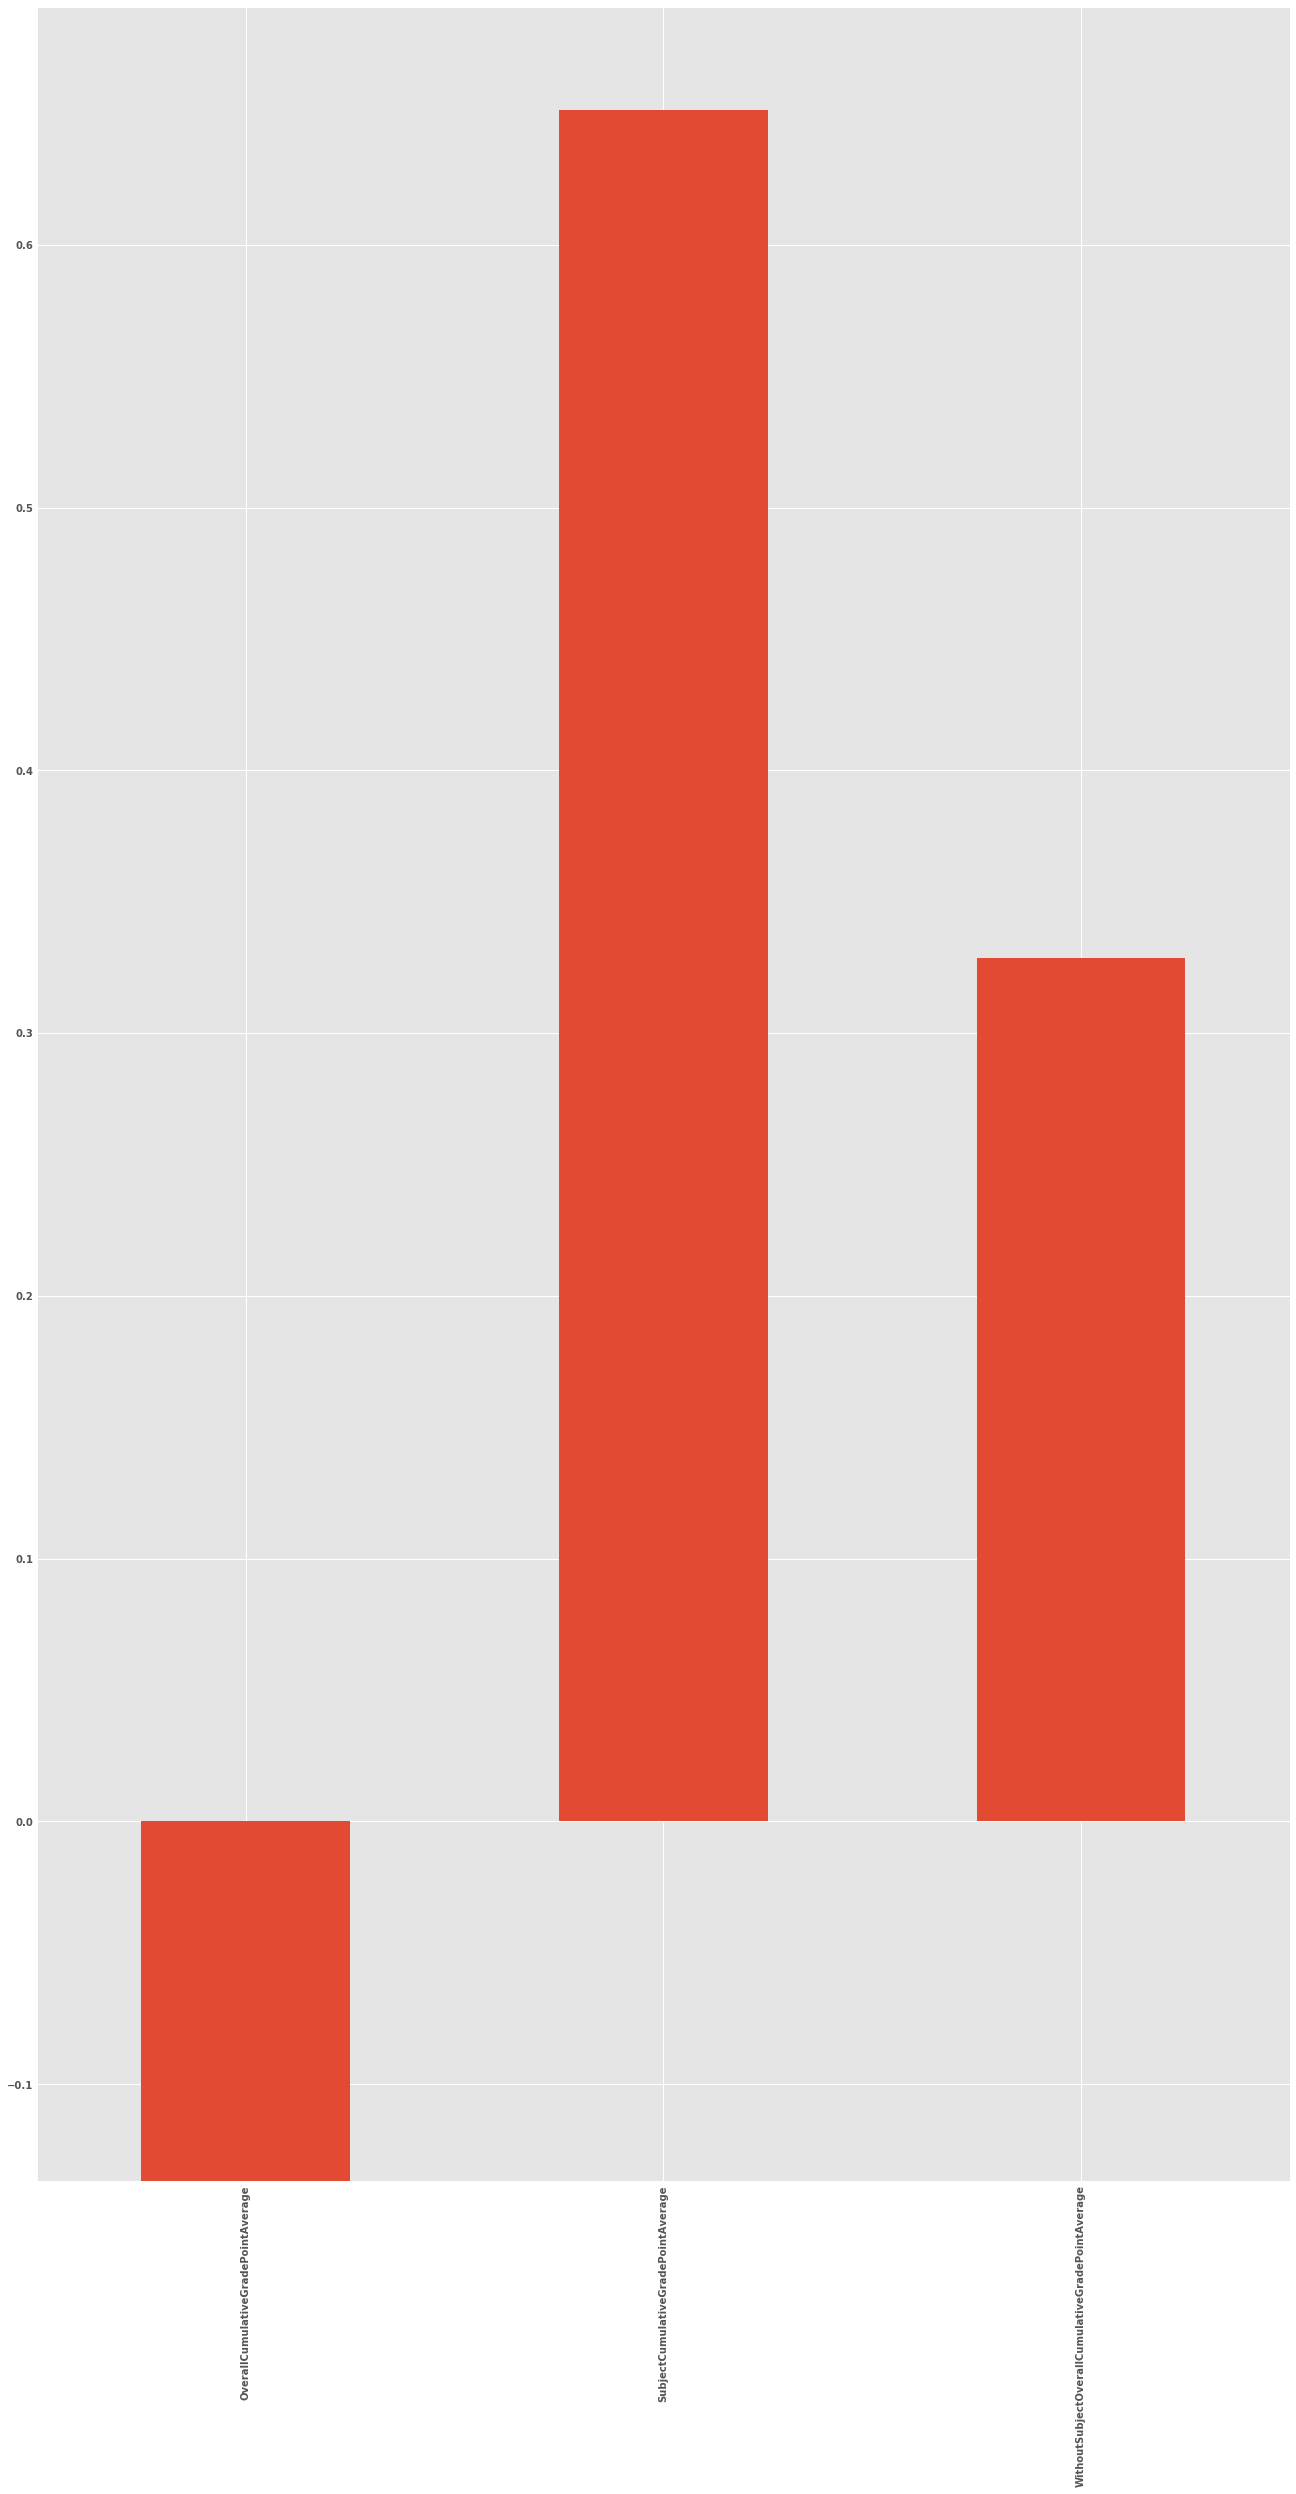

In [45]:
imp = dt_clf.feature_importances_
from matplotlib import pyplot as plt
%matplotlib inline
zip_vars = zip(imp,X.columns) # combine attributes
zip_vars=sorted(zip_vars) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has importance of', coef)
    
plt.style.use('ggplot')

weights.plot(kind='bar',figsize=(20,40))
plt.show()

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

accuracy_runs = []

rf_clf = RandomForestClassifier(criterion='gini', max_depth = 10,min_samples_leaf=5,
                                min_samples_split=5,max_leaf_nodes = 62,
                                max_features= None, random_state=1234)
for train_indices, test_indices in cv_object.split(X,y):  
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6591666666666667
precision: [0.58609539 0.69741854]
recall: [0.50347222 0.76296296]
fscore: [0.5416511  0.72871988]
support: [1440 2160]
accuracy: 0.6591666666666667
precision: [0.58609539 0.69741854]
recall: [0.50347222 0.76296296]
fscore: [0.5416511  0.72871988]
support: [1440 2160]
accuracy: 0.6591666666666667
precision: [0.58609539 0.69741854]
recall: [0.50347222 0.76296296]
fscore: [0.5416511  0.72871988]
support: [1440 2160]
accuracy: 0.6591666666666667
precision: [0.58609539 0.69741854]
recall: [0.50347222 0.76296296]
fscore: [0.5416511  0.72871988]
support: [1440 2160]
accuracy: 0.6591666666666667
precision: [0.58609539 0.69741854]
recall: [0.50347222 0.76296296]
fscore: [0.5416511  0.72871988]
support: [1440 2160]
accuracy: 0.6591666666666667
precision: [0.58609539 0.69741854]
recall: [0.50347222 0.76296296]
fscore: [0.5416511  0.72871988]
support: [1440 2160]
accuracy: 0.6591666666666667
precision: [0.58609539 0.69741854]
recall: [0.50347222 0.76296296]
fscore: [0

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

accuracy_runs = []

rf_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200, random_state=1234)
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6563888888888889
precision: [0.57742182 0.70161643]
recall: [0.52569444 0.74351852]
fscore: [0.55034533 0.72195999]
support: [1440 2160]
accuracy: 0.6563888888888889
precision: [0.57742182 0.70161643]
recall: [0.52569444 0.74351852]
fscore: [0.55034533 0.72195999]
support: [1440 2160]
accuracy: 0.6563888888888889
precision: [0.57742182 0.70161643]
recall: [0.52569444 0.74351852]
fscore: [0.55034533 0.72195999]
support: [1440 2160]
accuracy: 0.6563888888888889
precision: [0.57742182 0.70161643]
recall: [0.52569444 0.74351852]
fscore: [0.55034533 0.72195999]
support: [1440 2160]
accuracy: 0.6563888888888889
precision: [0.57742182 0.70161643]
recall: [0.52569444 0.74351852]
fscore: [0.55034533 0.72195999]
support: [1440 2160]
accuracy: 0.6563888888888889
precision: [0.57742182 0.70161643]
recall: [0.52569444 0.74351852]
fscore: [0.55034533 0.72195999]
support: [1440 2160]
accuracy: 0.6563888888888889
precision: [0.57742182 0.70161643]
recall: [0.52569444 0.74351852]
fscore: [0

In [48]:
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 1
num_instances = len(y)
cv_object1 = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 998867)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=12345, test_size=0.2, train_size=None)


accuracy: 0.6511111111111111
[[ 753  731]
 [ 525 1591]]
precision: [0.58920188 0.68518519]
recall: [0.5074124  0.75189036]
fscore: [0.54525706 0.71698963]
support: [1484 2116]
average accuracy:  0.6511111111111111
AUC of Precision Recall curve 0.791


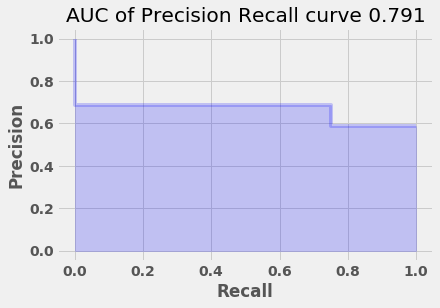

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

accuracy_runs = []

#rf_clf = RandomForestClassifier(n_estimators = 150,criterion='entropy', max_depth = 10, min_samples_leaf=5,
#                                min_samples_split=5,max_leaf_nodes = 62,
#                                max_features= None)

rf_clf = RandomForestClassifier(criterion= 'gini', min_samples_leaf=0.1, min_samples_split=0.2, max_features=None, random_state=98452)

for train_indices, test_indices in cv_object1.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
    y_train = y_m[train_indices]
    y_train = np.ravel(y_train)
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)
    
    cm = confusion_matrix(y_test, yhat)

    print (cm.view())

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())
y_test_probabilities = rf_clf.predict_proba(X_test)

#y_test_probabilities has shape = [n_samples, n_classes]

#y_test_predictions_high_precision = y_test_probabilities[:,1] > 0.7
#y_test_predictions_high_recall = y_test_probabilities[:,1] > 0.3

plt.style.use('fivethirtyeight')
precision, recall, _ = precision_recall_curve(y_test, y_test_probabilities[:,1]>.5)
area = mt.auc(recall, precision)
print("AUC of Precision Recall curve %1.3f" %area)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.title("AUC of Precision Recall curve %1.3f" %area)
plt.xlabel('Recall')
plt.ylabel('Precision')

SubjectCumulativeGradePointAverage has importance of WithoutSubjectOverallCumulativeGradePointAverage
SubjectCumulativeGradePointAverage has importance of OverallCumulativeGradePointAverage
SubjectCumulativeGradePointAverage has importance of SubjectCumulativeGradePointAverage


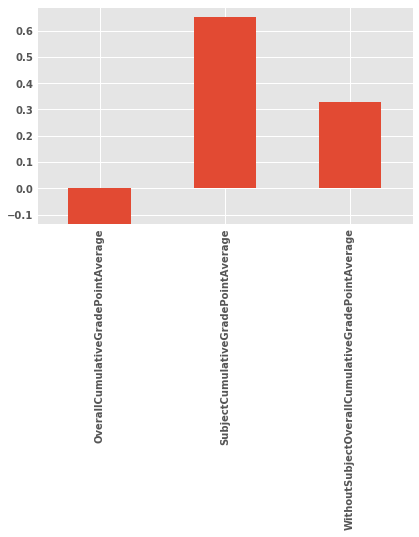

In [50]:
from matplotlib import *
from matplotlib import pyplot as plt
 

%matplotlib inline
zip_vars = zip(rf_clf.feature_importances_,X.columns) # combine attributes
zip_vars=sorted(zip_vars) # sort them 
for coef, coef in zip_vars:
    print(name, 'has importance of', coef)
    
plt.style.use('ggplot')


weights.plot(kind='bar')

 
plt.show()





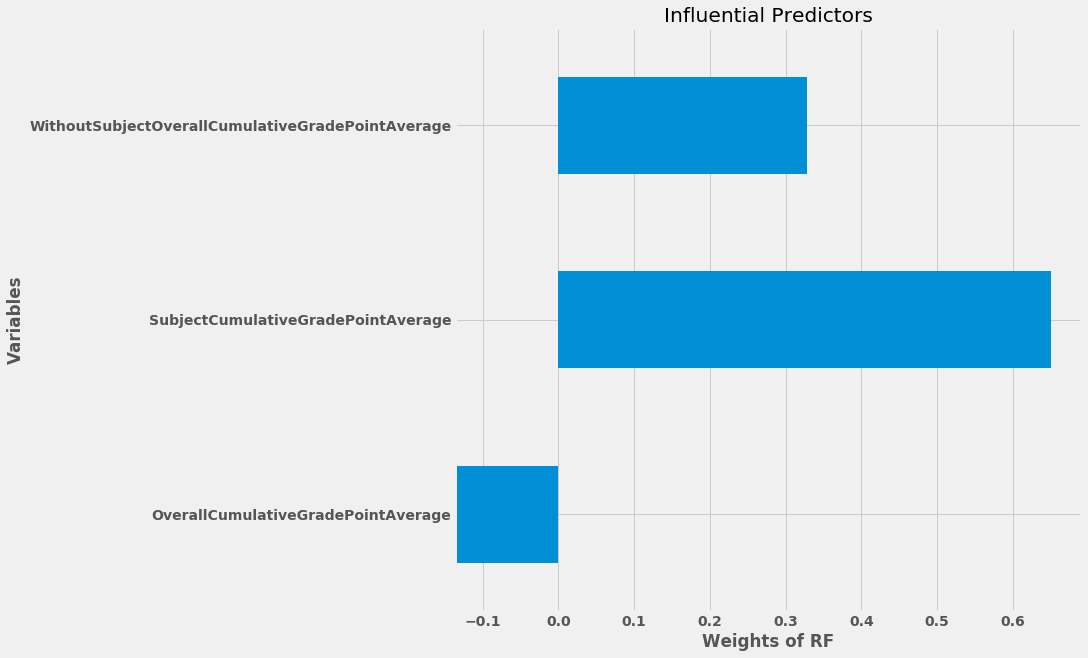

In [51]:

# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
weights.plot.barh(figsize=(10,10))
plt.title("Influential Predictors")
plt.xlabel('Weights of RF')
plt.ylabel('Variables')

plt.show()

In [52]:
df_exclusive = pd.read_csv('EnglishTransferLevel040718_SQL03_Exclusive.csv',header=0,low_memory=False)


In [53]:
MMAPEnglishFull = df_exclusive
English = df_exclusive
MMAPEnglishFull.shape

(9121, 107)

In [54]:
df_excl_course_success_other_values = English[['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace','EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops','hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code','hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id','hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points','Gender', 'CohortYear','StudentID']]


In [55]:
Exclcolumns = ['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace','EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops','hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code','hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id','hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points','Gender', 'CohortYear','StudentID']

English = English.drop(Exclcolumns, axis = 1)

In [56]:
# Remove NAN's
English.dropna(inplace=True)

In [57]:
English

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind
0,2.500,3.167,2.357,1
1,3.029,1.250,3.267,1
2,3.296,2.888,3.363,0
3,2.192,2.375,2.163,1
4,1.208,1.283,1.185,1
5,2.471,2.663,2.431,1
6,3.107,2.838,3.162,1
7,3.022,2.857,3.060,1
8,2.178,2.167,2.179,0
9,2.636,1.833,2.815,0


In [58]:
df_excl_course_success_other_values

,hs_09_grade_level,hs_09_course_title,hs_09_course_grade,hs_09_course_grade_category,hs_09_course_ag_code,hs_09_course_level_code,hs_09_course_type_code,hs_10_grade_level,hs_10_course_title,hs_10_course_grade,...,hs_recency_grade_level,hs_11_course_success_ind,hs_12_course_success_ind,hs_recency_course_success_ind,hs_11_course_grade_points,hs_12_course_grade_points,hs_recency_course_grade_points,Gender,CohortYear,StudentID
0,9.0,ENG 9 2 P,B,3.0,B,40,XX,10.0,ENG 10 2P HELM,A,...,11,1.0,NaN,1,2.0,NaN,2.0,M,2012-2013,59999
1,9.0,ENGLISH 9B,C,2.0,B,XX,XX,10.0,ENGLISH 10B,F,...,10,NaN,NaN,0,NaN,NaN,0.0,F,2013-2014,60000
2,9.0,LA/COM I,A,4.0,GB,XX,XX,10.0,LA/COM II,A-,...,12,1.0,1.0,1,3.0,1.7,1.7,M,2012-2013,60001
3,9.0,ENGLISH 1B,D+,1.0,GB,32,XX,10.0,ENGLISH 2B,A-,...,12,1.0,1.0,1,2.0,3.0,3.0,M,2013-2014,60002
4,9.0,ENGLISH 1 P,D,1.0,B,32,XX,10.0,ENGLISH 2 P,XX,...,11,0.0,NaN,0,1.0,NaN,1.0,F,2012-2013,60003
5,9.0,ENGLISH 9 P,C-,2.0,GB,XX,XX,10.0,ENGLISH 10 P,D,...,12,1.0,1.0,1,3.3,3.7,3.7,M,2015-2016,60004
6,9.0,ENG 1A (P) L2,A,4.0,B,XX,XX,10.0,ENG 2A (P),C,...,12,1.0,1.0,1,2.0,2.3,2.3,M,2012-2013,60005
7,9.0,Eng 1 P,C,2.0,B,XX,XX,10.0,Eng 2 P,C+,...,12,1.0,1.0,1,2.3,3.7,3.7,F,2015-2016,60006
8,9.0,ENG 9 G P,D,1.0,B,33,XX,10.0,ENG 10 G P,B,...,11,0.0,NaN,0,1.0,NaN,1.0,F,2012-2013,60007
9,9.0,ENGLISH 2 CL(P),D,1.0,B,33,XX,10.0,ENG 4 ADV (P),B,...,11,1.0,NaN,1,2.0,NaN,2.0,M,2013-2014,60008


In [59]:
df_excl_course_success_target_values = English[['cc_00_course_success_ind']]

In [60]:
del English['cc_00_course_success_ind']

df_exclusive_with_coursesuccessvalues = English.join(df_excl_course_success_target_values)

In [61]:
English.dtypes.index

Index(['OverallCumulativeGradePointAverage',
       'SubjectCumulativeGradePointAverage',
       'WithoutSubjectOverallCumulativeGradePointAverage'],
      dtype='object')

In [62]:

y_hat = rf_clf.predict(English)


In [63]:
    acc = mt.accuracy_score(df_excl_course_success_target_values,y_hat)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(df_excl_course_success_target_values,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    precision, recall, fscore, support = score(df_excl_course_success_target_values, y_hat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

====Iteration 10  ====
accuracy 0.6790922048021051
confusion matrix
 [[1471 1228]
 [1699 4723]]
precision: [0.46403785 0.79364813]
recall: [0.54501667 0.73544067]
fscore: [0.5012779  0.76343651]
support: [2699 6422]
